In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import scipy.interpolate
import os
from gpaw import GPAW, PW
from sklearn.model_selection import GridSearchCV

In [2]:
data_path = 'magneticmoment_Ef_data.csv'
df = pd.read_csv(data_path)
reduced_df = df.drop(columns = ['Unnamed: 0', 'elem_frac', 'elem_list', 
                               'formula', 'spin_index', 'num_p', 'num_f',
                               'atomic_rad', 'atomic_vol', 'covalent_rad',
                               'dipole', 'eaffinity', 'num_electrons', 'lastsubshell_avg',
                               ])

# Linear

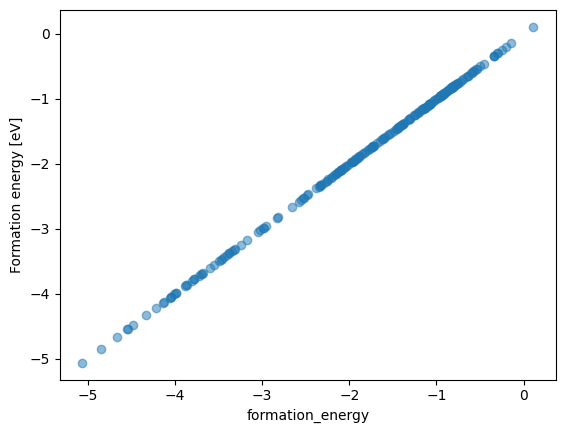

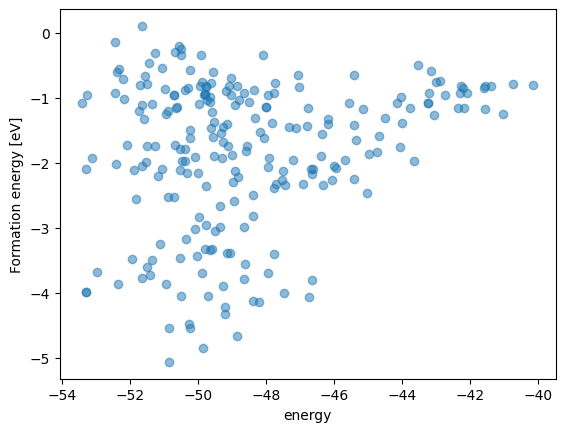

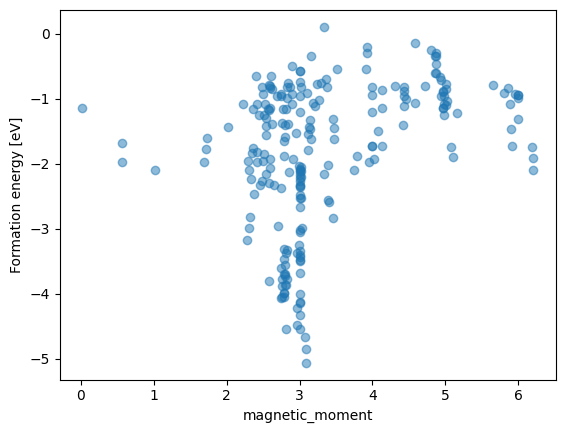

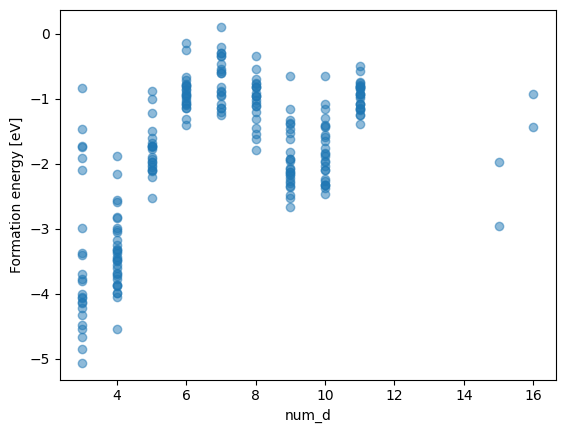

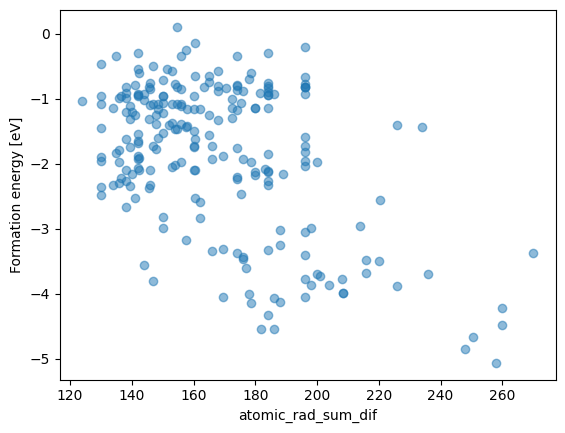

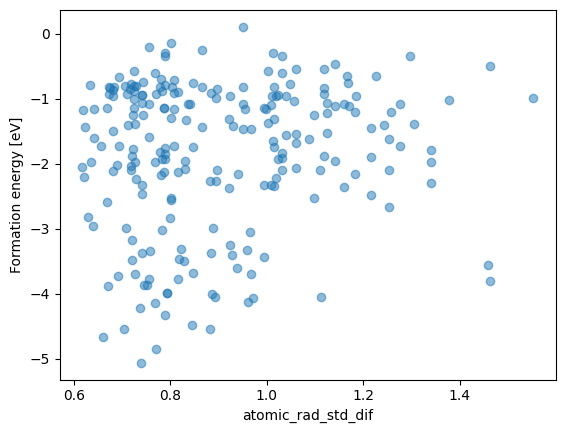

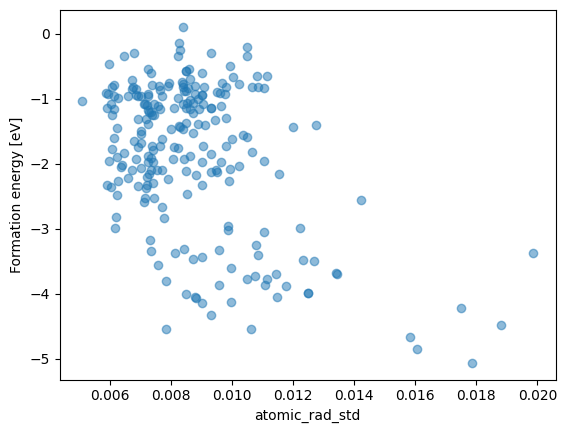

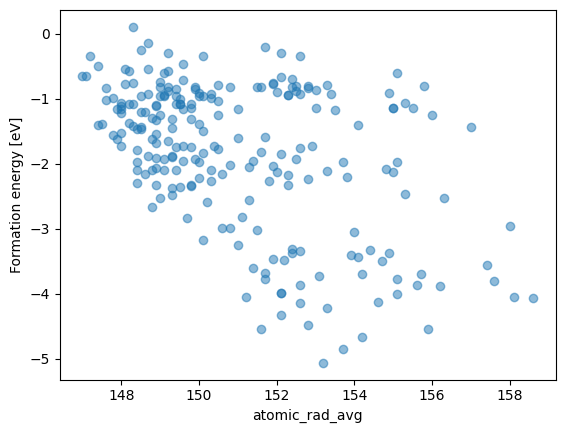

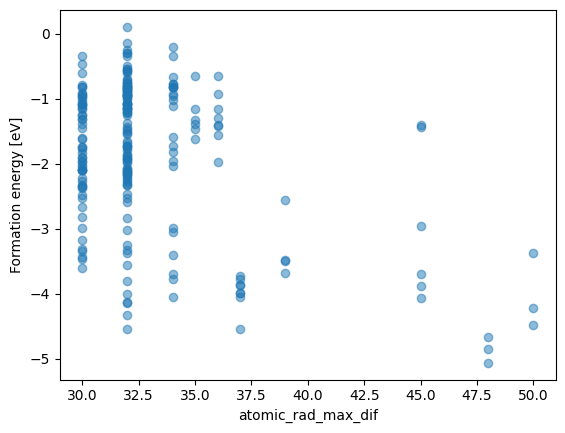

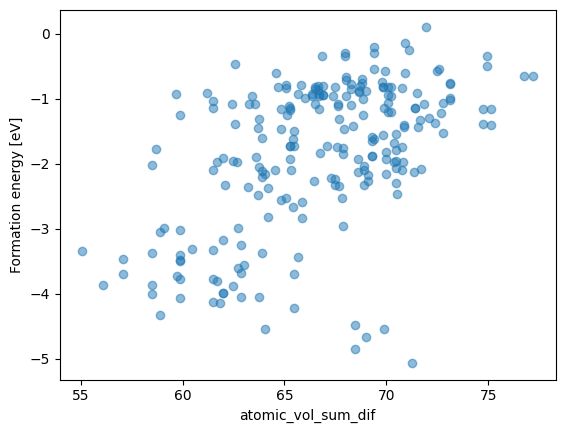

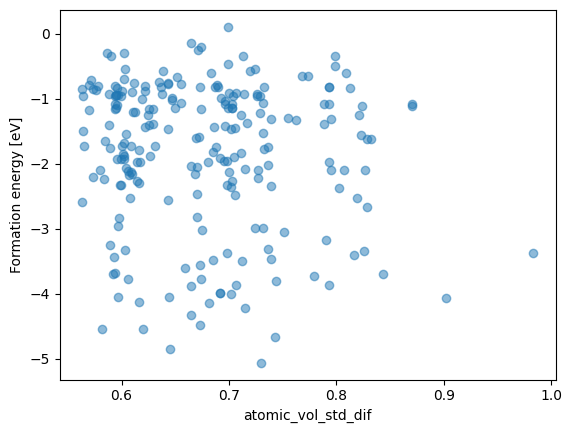

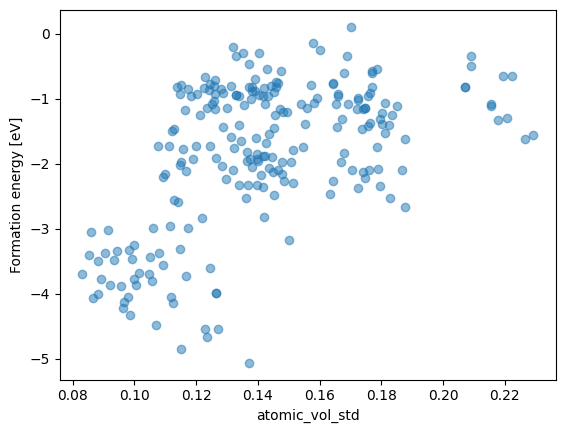

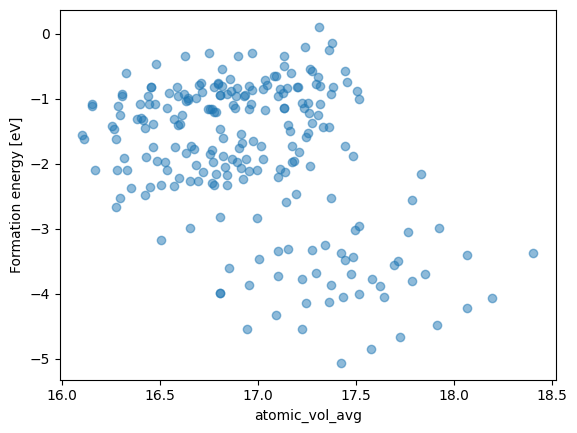

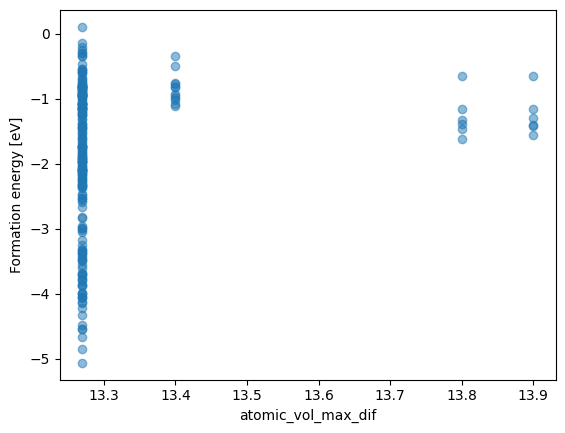

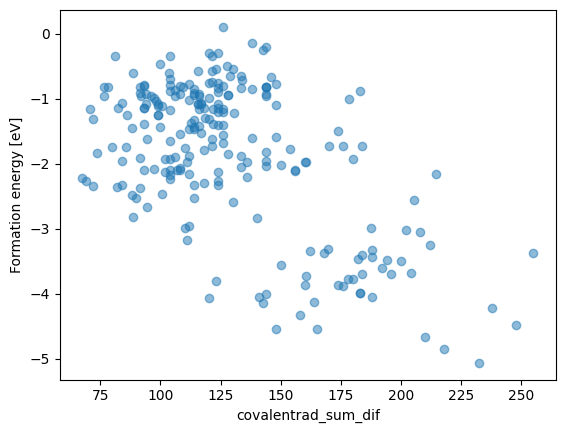

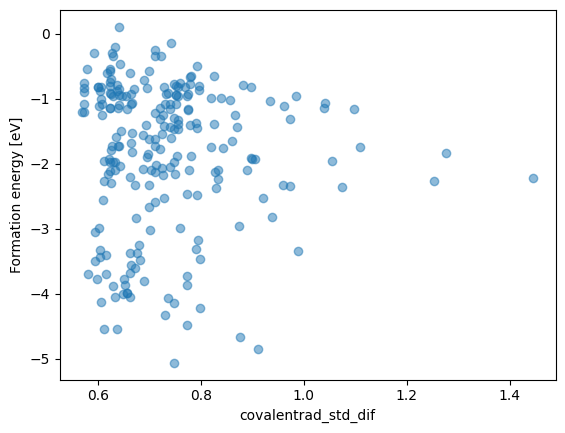

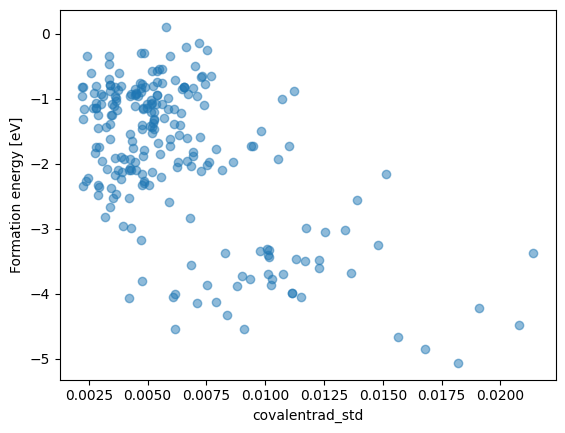

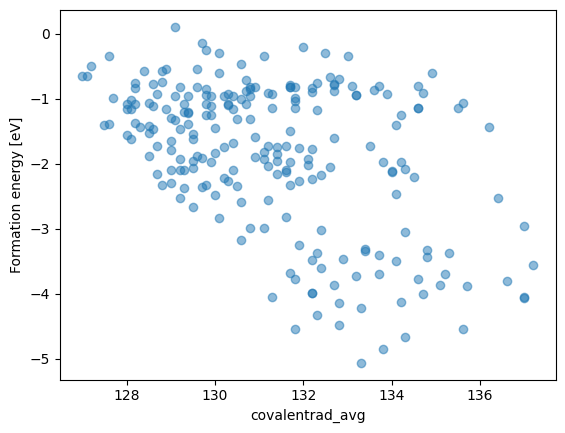

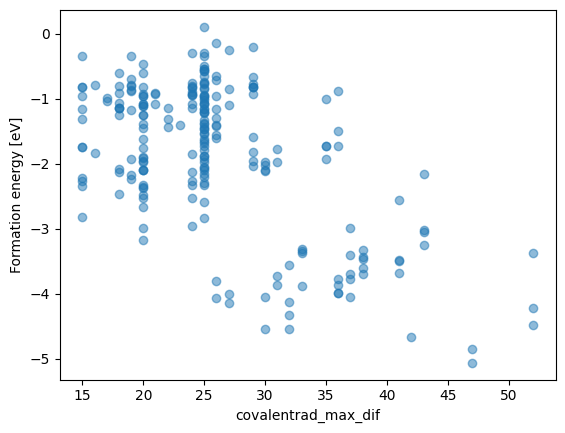

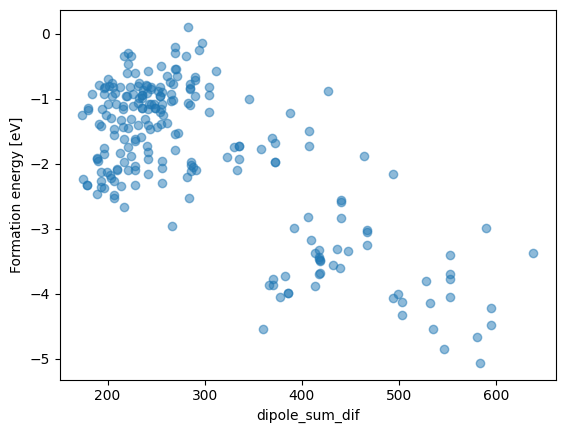

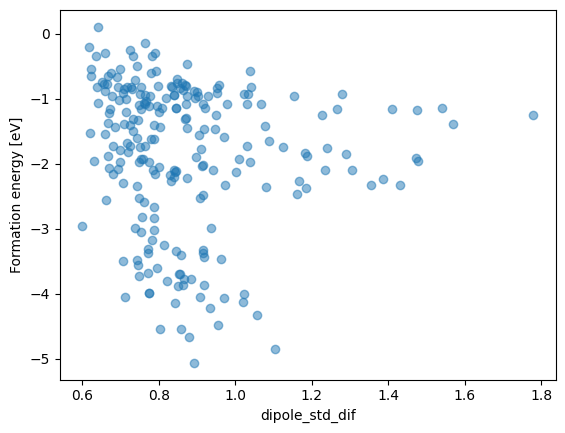

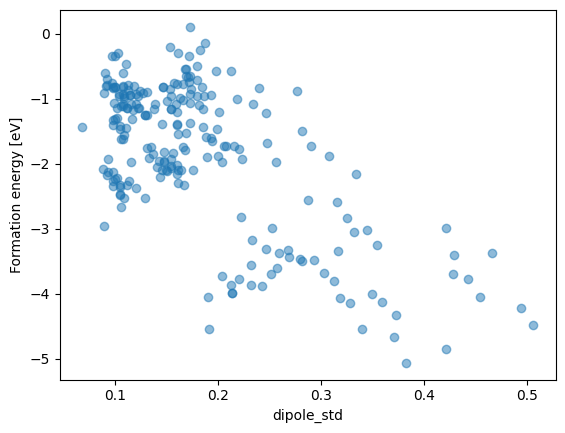

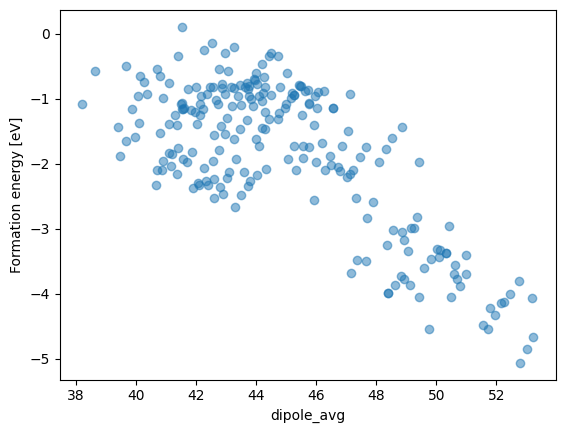

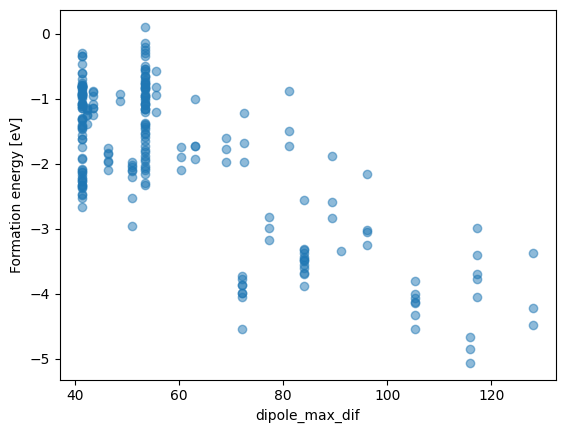

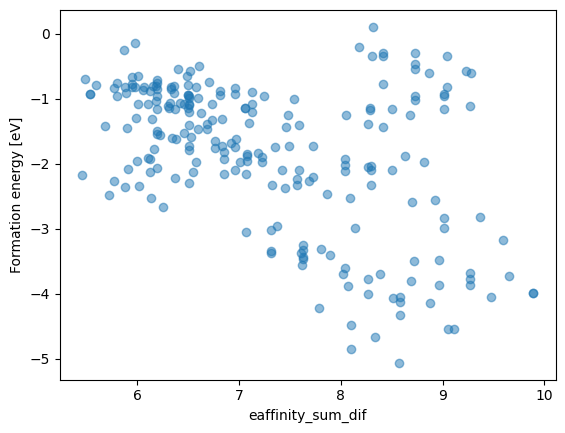

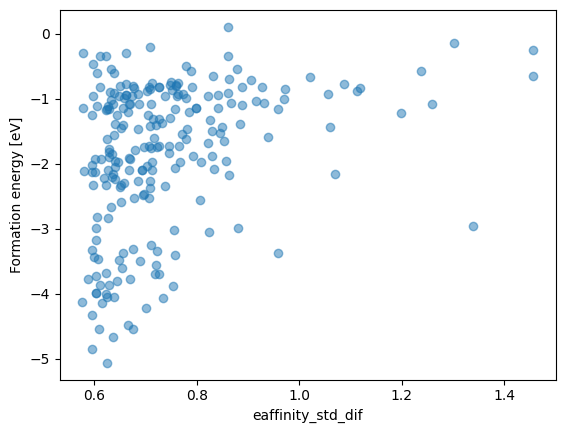

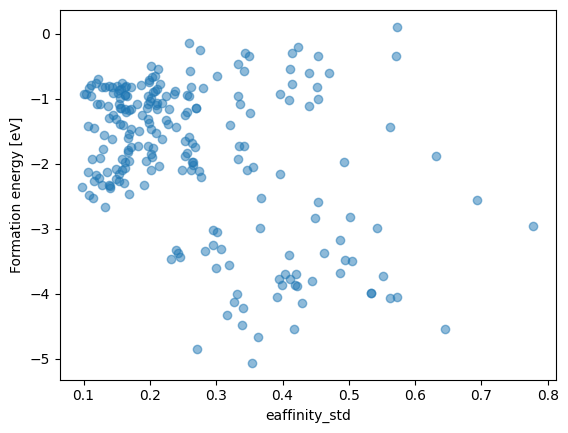

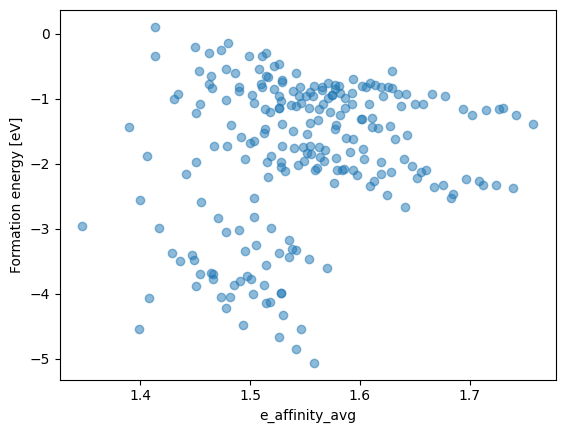

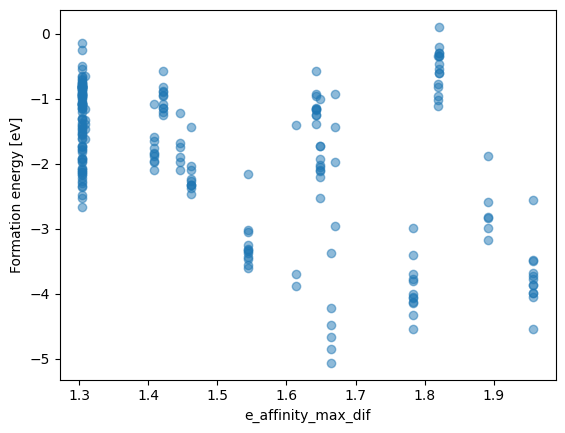

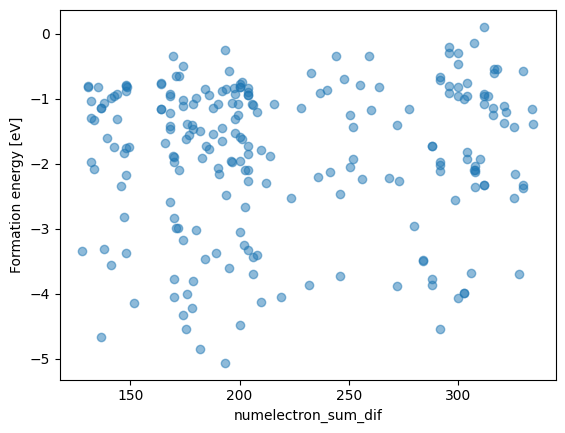

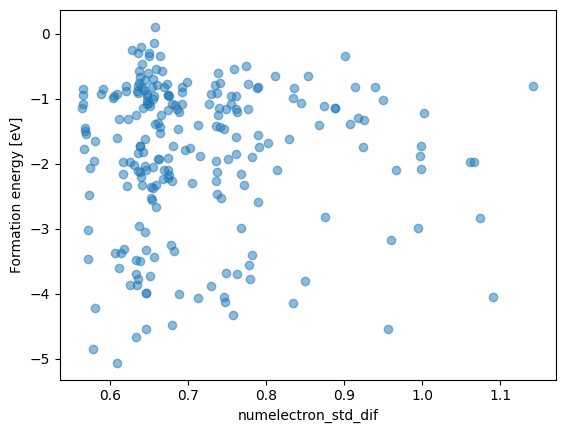

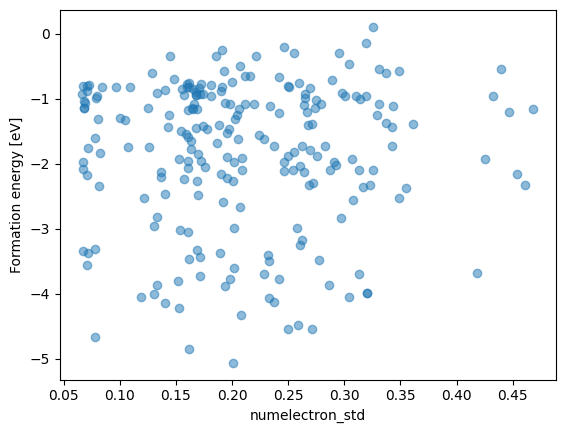

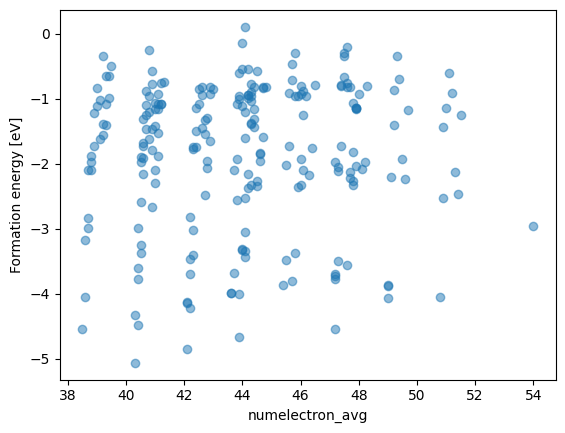

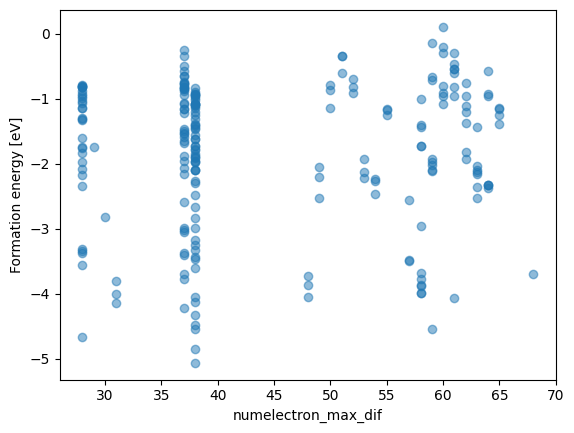

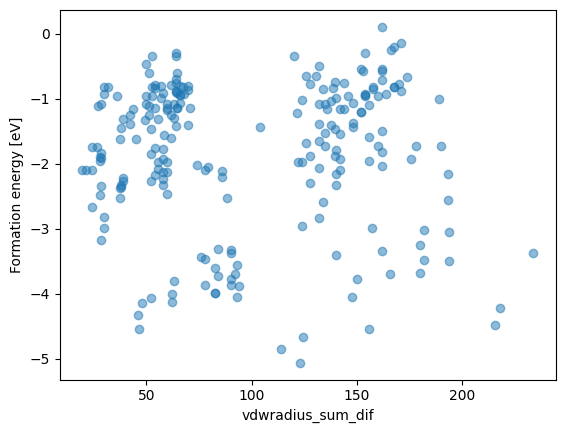

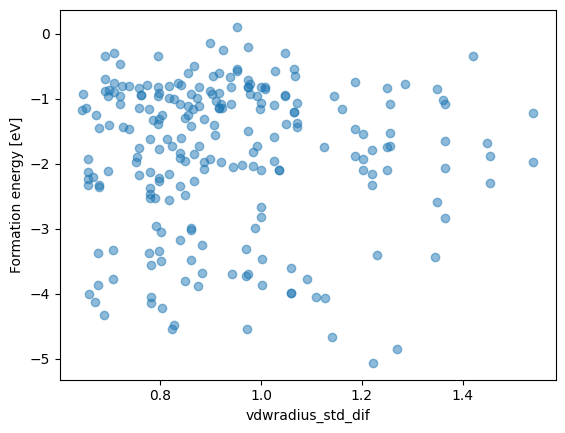

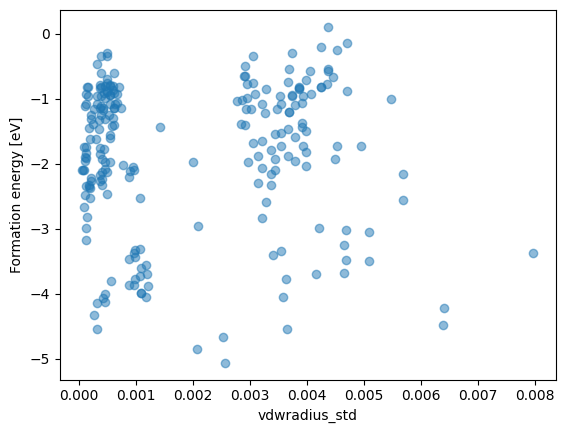

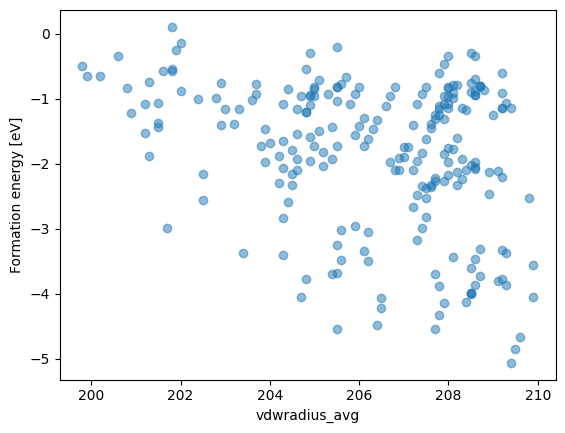

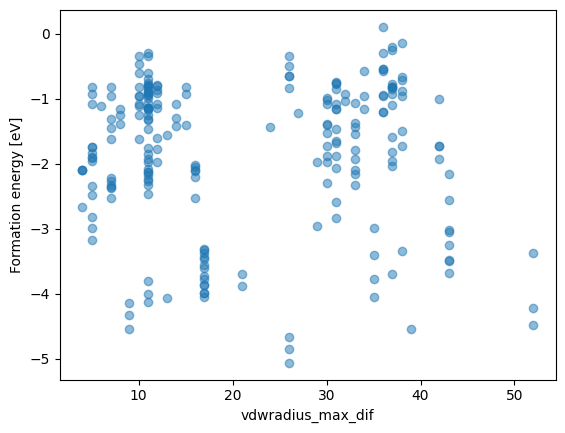

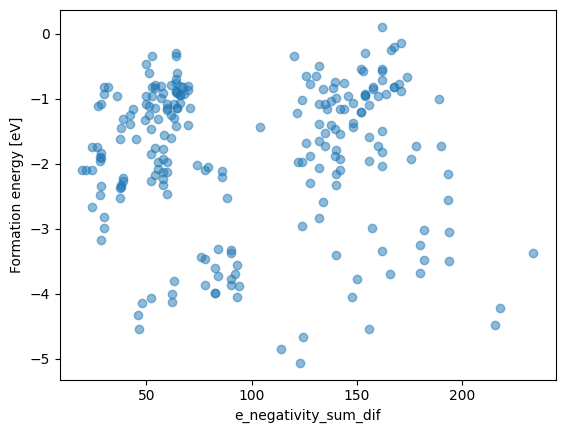

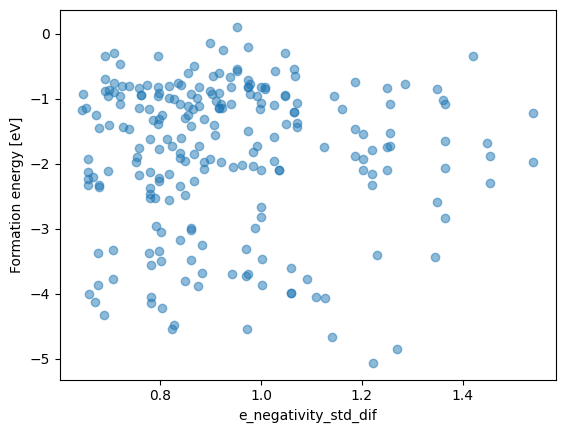

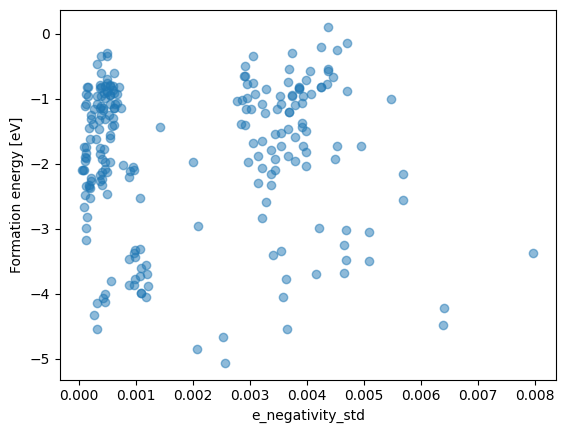

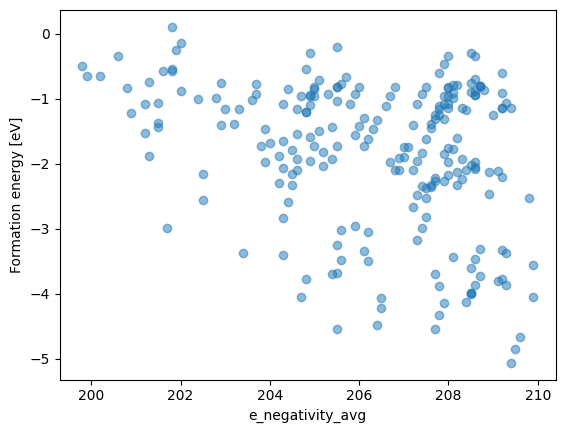

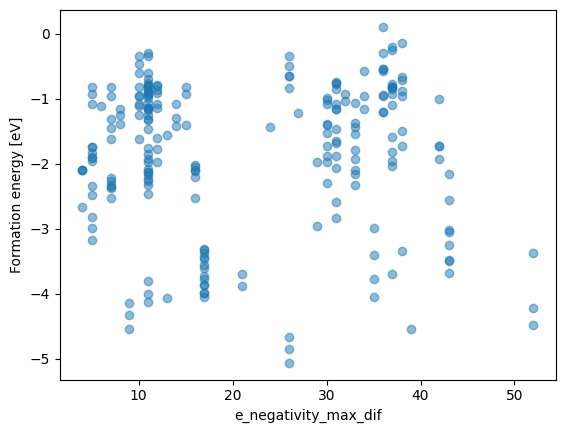

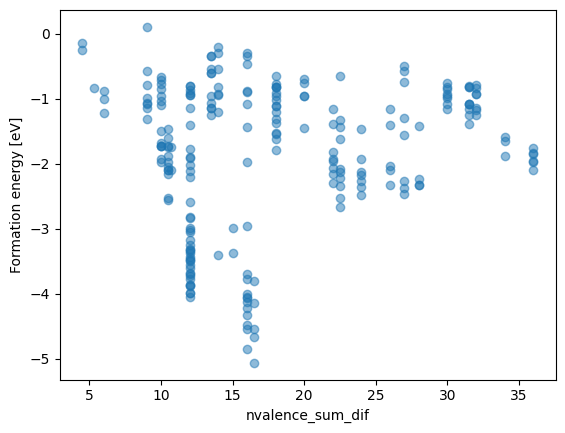

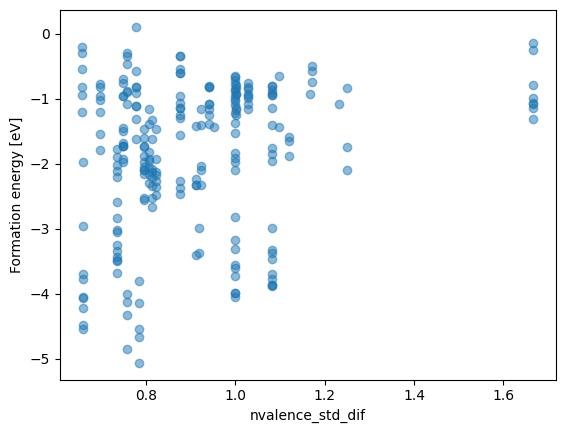

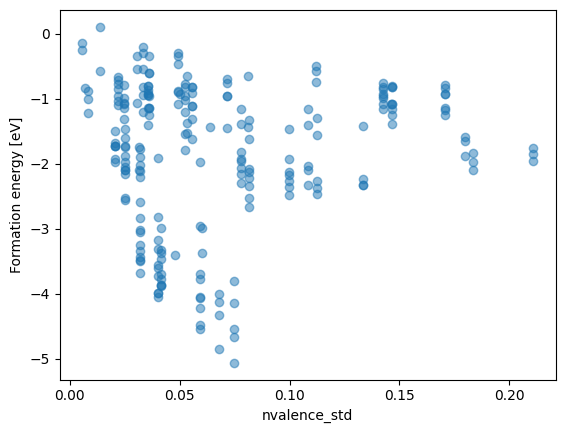

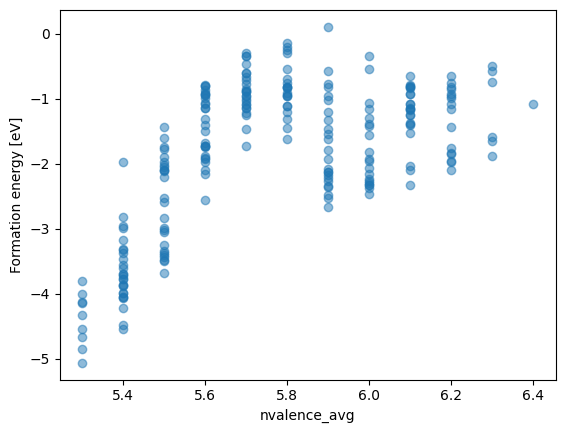

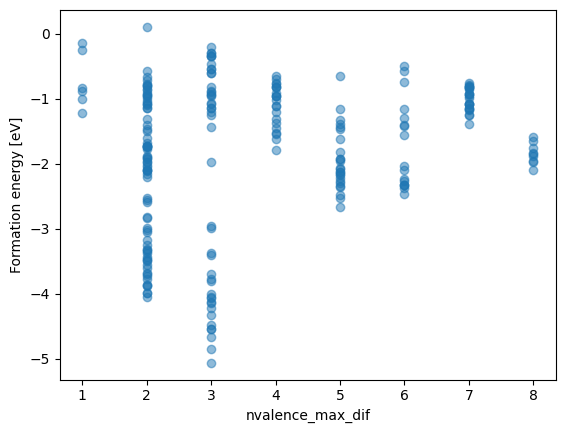

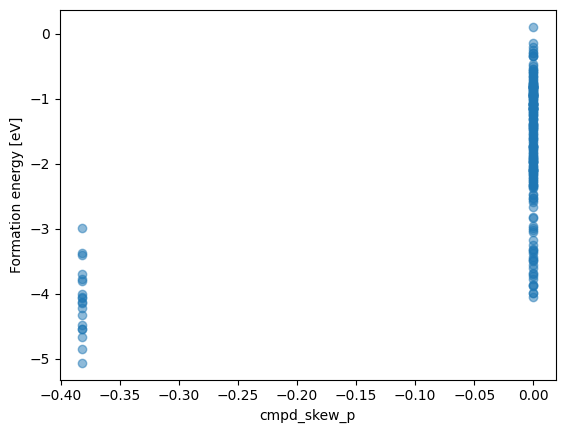

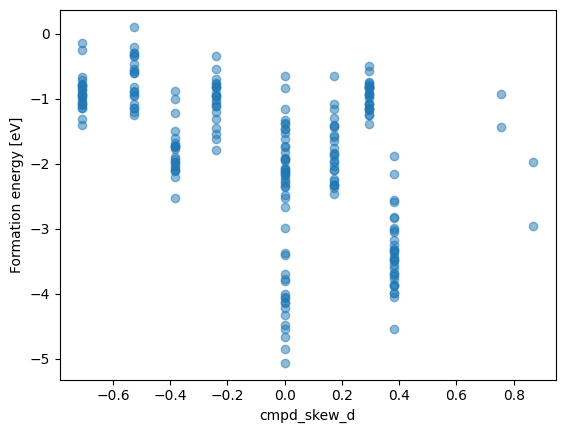

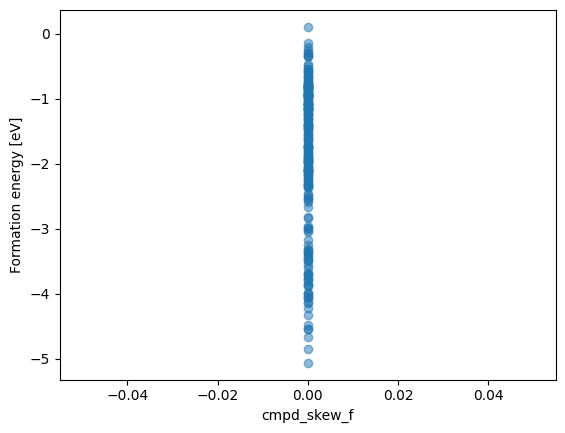

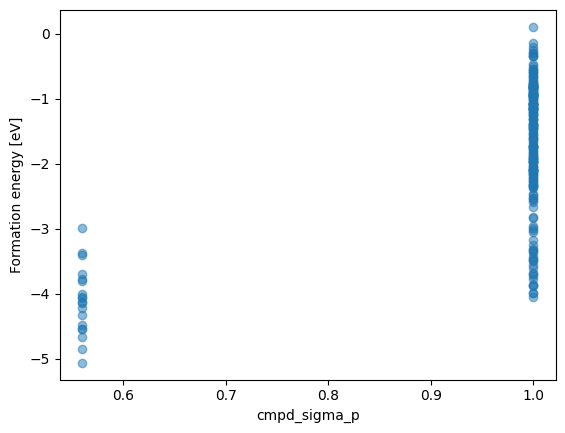

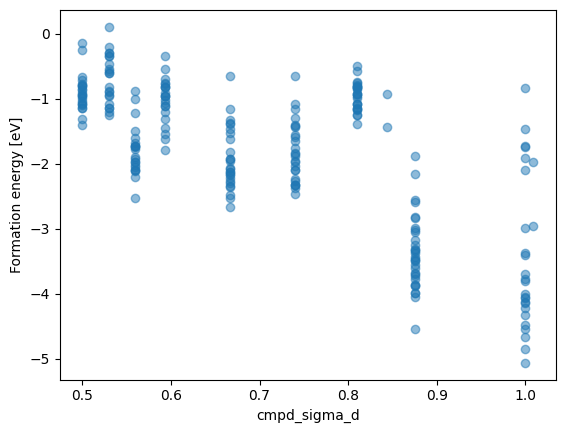

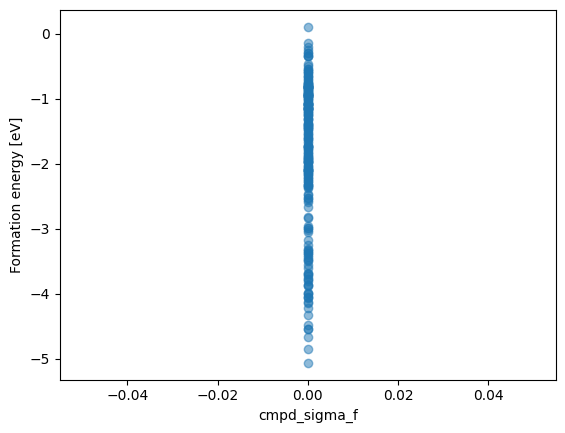

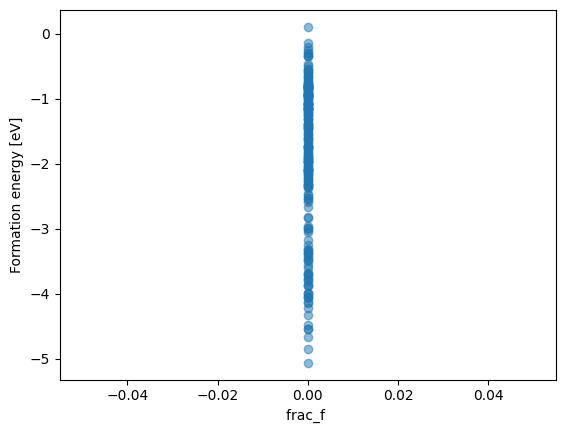

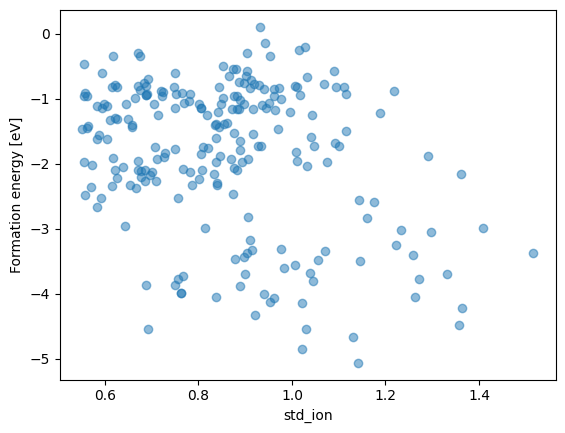

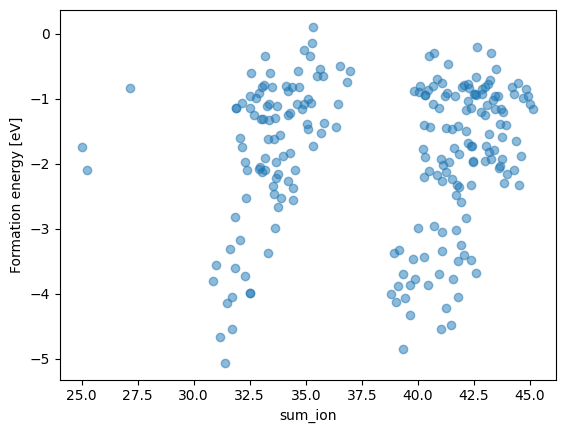

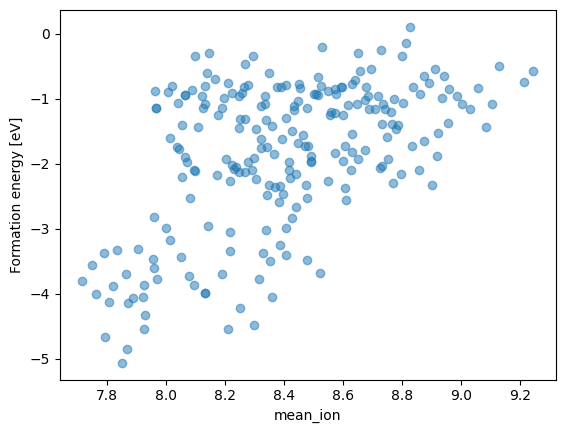

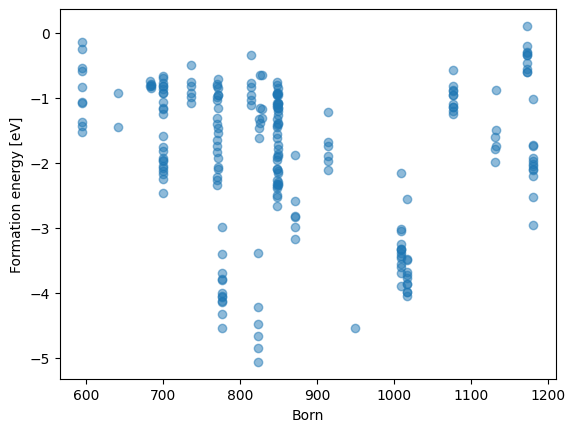

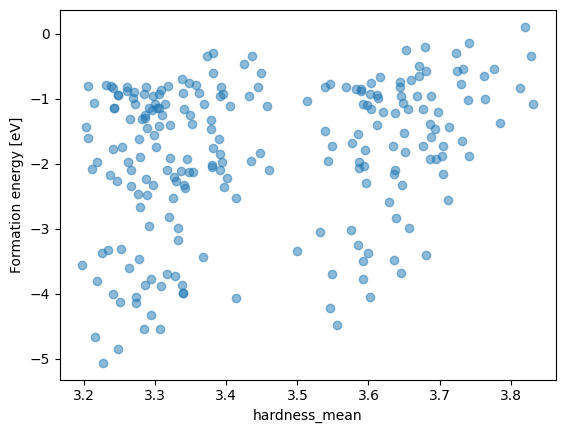

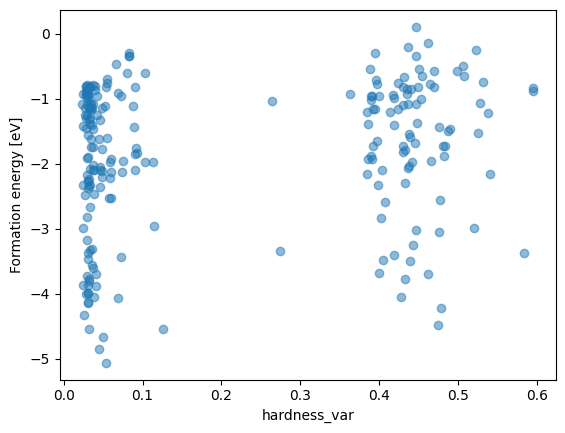

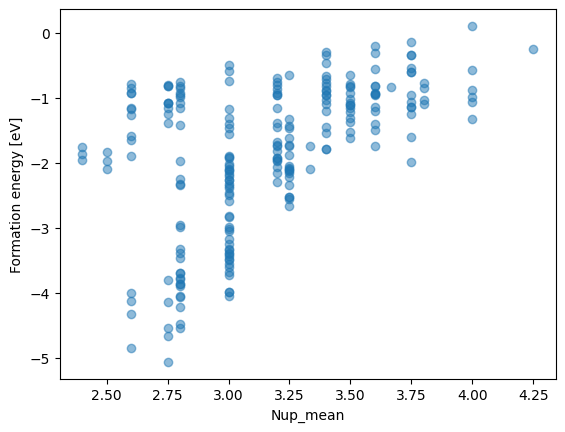

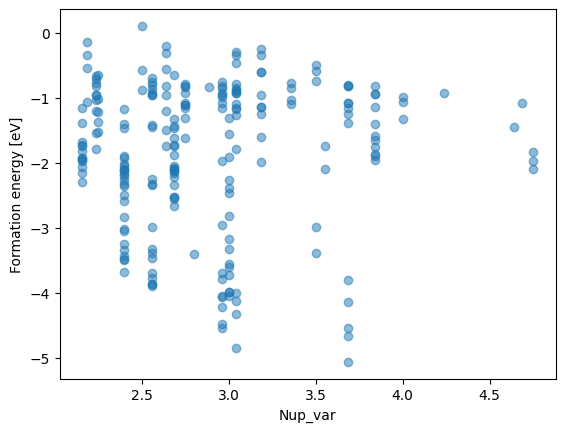

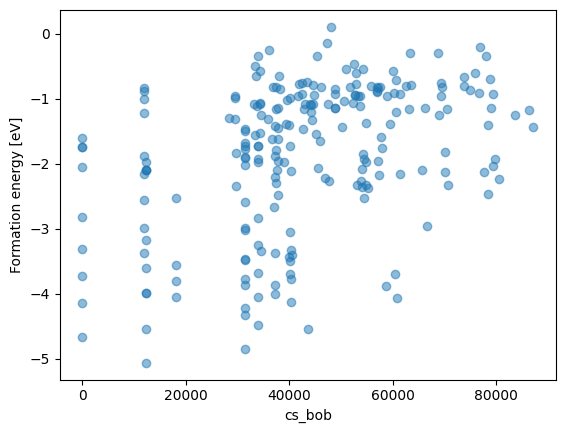

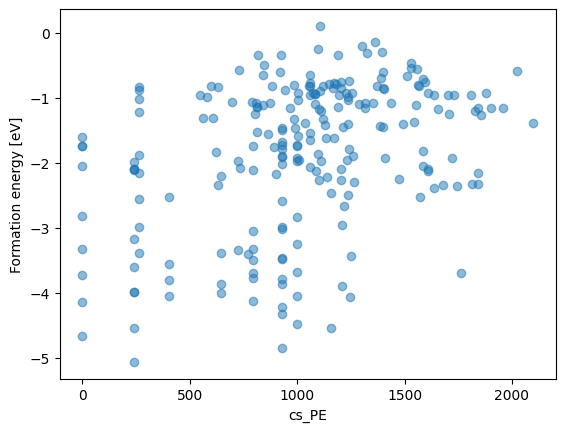

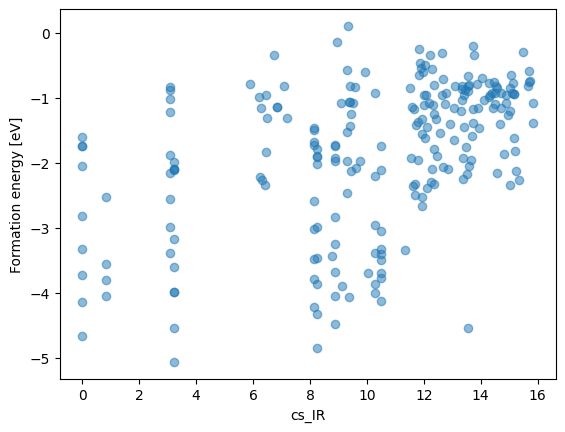

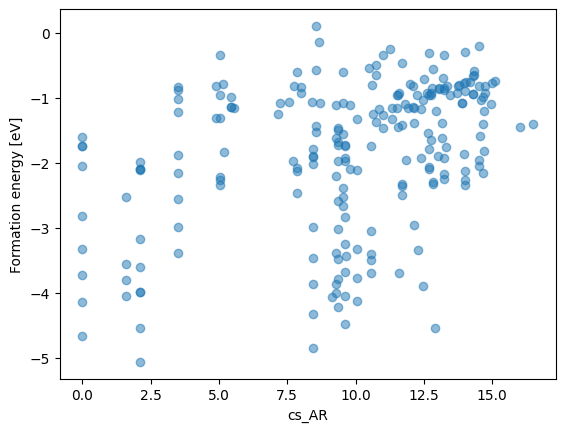

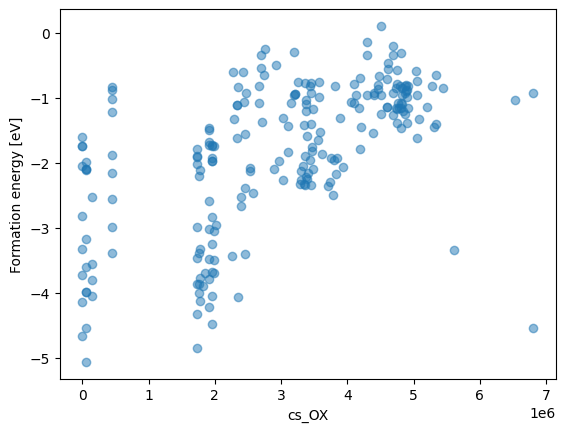

In [4]:
for i in reduced_df.columns:
    x = df[[i]]
    y = df['formation_energy']
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel(i)
    plt.ylabel("Formation energy [eV]")
    plt.show()

Descriptor:  std_ion
R^2 score 0.09518064212060984
coef_ [-1.78411301]
intercept_ -0.31720531603671653
y_pred [-1.90055559 -1.40854843 -1.30107777 -1.84122468]
mean_squared_error:  0.19863358225262637



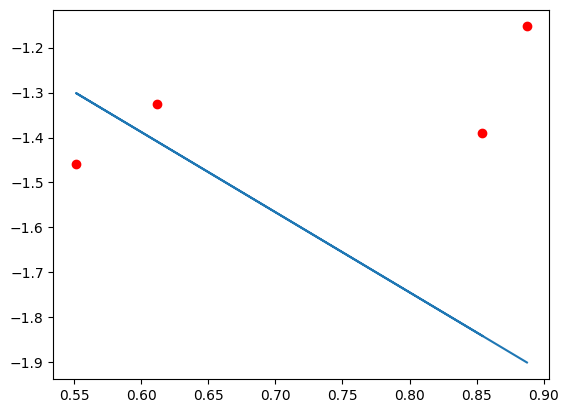

Descriptor:  nvalence_avg
R^2 score 0.36198649963480445
coef_ [2.44903608]
intercept_ -15.964625471858747
y_pred [-1.27040902 -1.51531263 -1.51531263 -1.27040902]
mean_squared_error:  0.01684290466022185



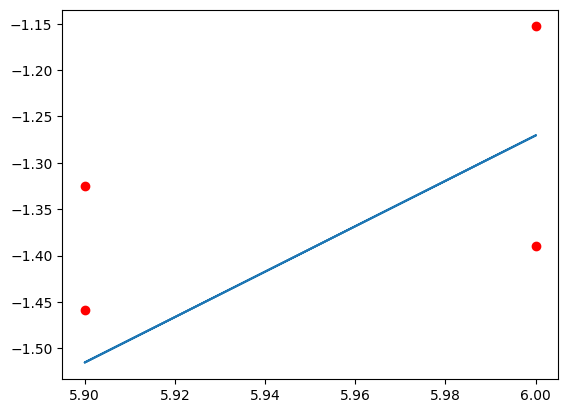

Descriptor:  dipole_max_dif
R^2 score 0.5679574561718561
coef_ [-0.03935959]
intercept_ 0.4742341168773547
y_pred [-1.63032339 -1.15525308 -1.15525308 -1.63032339]
mean_squared_error:  0.10164851800721832



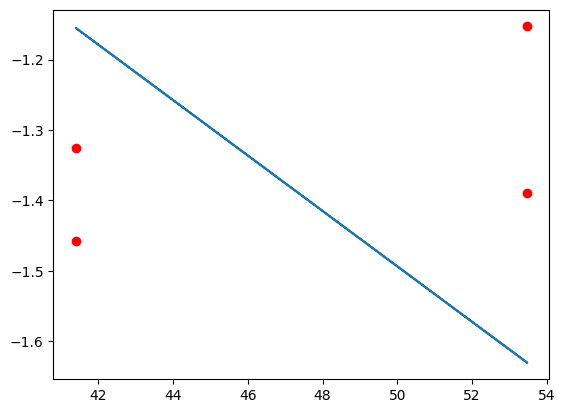

Descriptor:  dipole_std_dif
R^2 score 0.009455113205595556
coef_ [-0.55508116]
intercept_ -1.3639042257893794
y_pred [-1.73701961 -1.77779118 -1.87381266 -1.75713256]
mean_squared_error:  0.21340616870131318



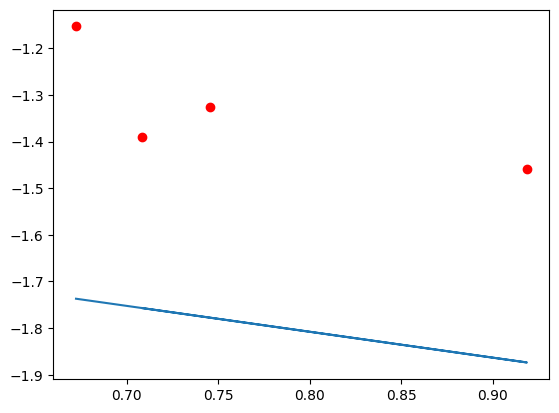

Descriptor:  atomic_vol_max_dif
R^2 score 0.028126012984881266
coef_ [1.43856985]
intercept_ -20.989878844794102
y_pred [-1.13761492 -1.13761492 -1.13761492 -1.13761492]
mean_squared_error:  0.05045265080701683



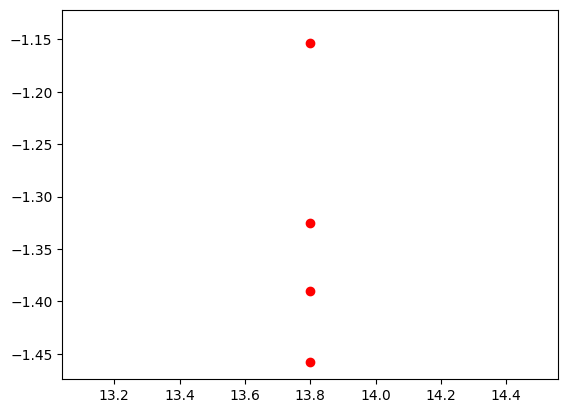

Descriptor:  atomic_rad_max_dif
R^2 score 0.19541099593833122
coef_ [-0.12888021]
intercept_ 2.410644285221223
y_pred [-2.10016295 -2.10016295 -2.10016295 -2.10016295]
mean_squared_error:  0.6036289194231983



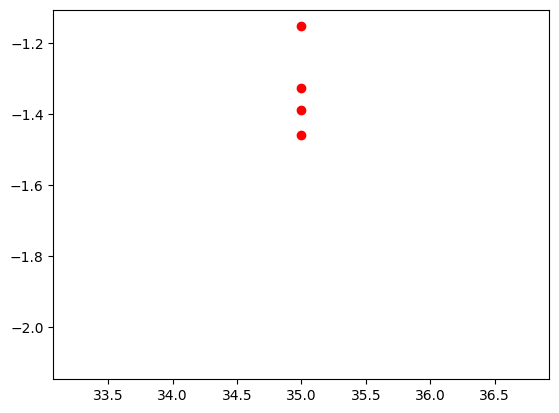

In [5]:
tmpX = ['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif',
        'atomic_vol_max_dif','atomic_rad_max_dif']

for i in tmpX:
    print("Descriptor: ", i)
    X = df[[i]] # only one descriptor
    X = np.asarray(X)
    y = df['formation_energy']

    reg = LinearRegression().fit(X, y) # Create model
    print("R^2 score", reg.score(X, y)) # Calculate R^2
    print("coef_", reg.coef_)
    print("intercept_", reg.intercept_)
    X_pred = [X[0],X[1],X[2],X[3]] # Create X data for evaluation
    y_pred = reg.predict(X_pred) # make model prediction given X data
    print("y_pred", y_pred)
    
    y_true = [y[0], y[1], y[2], y[3]]
    mean_squared_error = np.mean((y_true - y_pred)**2)
    print("mean_squared_error: ", mean_squared_error)
    print("")
    
    plt.plot(X_pred, y_pred)
    plt.scatter(X_pred, y_true, color = 'red')
    plt.show()

# Random Forest

In [48]:
y = df['formation_energy'].values
X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif',
        'atomic_vol_max_dif','atomic_rad_max_dif']]
#X = df['nvalence_avg']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
#print(X.shape)
#print(X_train.shape)
#print(X.shape)
#print(y.shape)
#print(type(X))
#X_np = df.to_numpy()
#print(type(X_np))
#print(X)
#print(X_np.shape)
#print(X_np)
#print(X)
print(X.shape)
X_np = np.array(X)
y_np = np.array(y)
print(X_np.shape)
print(y_np.shape)

(226, 6)
(226, 6)
(226,)


## Check the Variance of the ML Model

In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(n_estimators=130, max_depth=7), X_np, y_np, cv = 50, scoring = 'r2')
print(scores)
print(abs(scores))
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

[ -0.57417891  -7.49099966  -1.44773778  -0.89894759  -0.65267288
  -2.79458637  -9.20677327  -1.47413703   0.61770591   0.87635348
   0.96873796  -0.12716859   0.55118401   0.8582456    0.34024388
   0.88088539   0.3239419    0.17802804   0.90253493   0.79632884
 -25.26741264  -2.11084527   0.88333086   0.91371175   0.95590079
   0.79647224  -0.96618379   0.79944453   0.76256567   0.82623316
   0.94302631   0.80675253  -1.36753368  -0.10681955   0.20213867
   0.87546048  -1.92289726  -2.84726241  -1.61710413  -0.16219694
  -1.10520048  -0.85193877   0.35633301  -2.93374327  -0.02820883
   0.77425253  -2.92161304   0.830875    -1.58537249   0.85777003]
[ 0.57417891  7.49099966  1.44773778  0.89894759  0.65267288  2.79458637
  9.20677327  1.47413703  0.61770591  0.87635348  0.96873796  0.12716859
  0.55118401  0.8582456   0.34024388  0.88088539  0.3239419   0.17802804
  0.90253493  0.79632884 25.26741264  2.11084527  0.88333086  0.91371175
  0.95590079  0.79647224  0.96618379  0.7994445

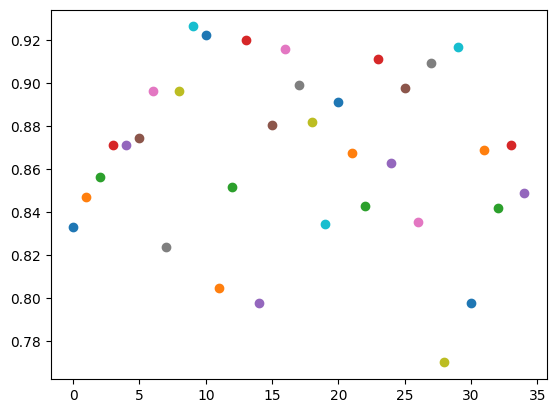

In [45]:
for i in range (0,35):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = i)
    rf_model = RandomForestRegressor(n_estimators=130,max_depth=7,
                                 min_samples_leaf = 1)
    rf_model.fit(X_train, y_train)

    predict = rf_model.predict(X_test)
    #print("R^2: ", rf_model.score(X_test, y_test))
    plt.scatter(i, rf_model.score(X_test, y_test))

## Hyperparameter Tuning

In [42]:
grid_param = {
    'n_estimators':[90,100,115,130],
#    'criterion':['squared_error', 'absolute_error'],
    'max_depth':range(2,10,1),
    'min_samples_leaf':range(1,10,1)
#    'min_samples_split':range(2,10,1),
}
grid_search = GridSearchCV(RandomForestRegressor(), grid_param, cv = 5, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, n_estimators=90;, score=0.786 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=1, n_estimators=90;, score=0.834 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=1, n_estimators=90;, score=0.736 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=1, n_estimators=90;, score=0.723 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=1, n_estimators=90;, score=0.749 total time=   0.1s
[CV 1/5] END max_depth=2, min_samples_leaf=1, n_estimators=100;, score=0.796 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=1, n_estimators=100;, score=0.838 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=1, n_estimators=100;, score=0.741 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=1, n_estimators=100;, score=0.716 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=1, n_estimators=100;, score=0.758 

[CV 4/5] END max_depth=2, min_samples_leaf=5, n_estimators=100;, score=0.734 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=5, n_estimators=100;, score=0.751 total time=   0.1s
[CV 1/5] END max_depth=2, min_samples_leaf=5, n_estimators=115;, score=0.802 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=5, n_estimators=115;, score=0.827 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=5, n_estimators=115;, score=0.736 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=5, n_estimators=115;, score=0.737 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=5, n_estimators=115;, score=0.757 total time=   0.1s
[CV 1/5] END max_depth=2, min_samples_leaf=5, n_estimators=130;, score=0.794 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=5, n_estimators=130;, score=0.826 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=5, n_estimators=130;, score=0.739 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_le

[CV 2/5] END max_depth=2, min_samples_leaf=9, n_estimators=130;, score=0.810 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=9, n_estimators=130;, score=0.735 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=9, n_estimators=130;, score=0.737 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=9, n_estimators=130;, score=0.750 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=1, n_estimators=90;, score=0.783 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=1, n_estimators=90;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=1, n_estimators=90;, score=0.767 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=1, n_estimators=90;, score=0.793 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=1, n_estimators=90;, score=0.783 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=1, n_estimators=100;, score=0.785 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=1,

[CV 4/5] END max_depth=3, min_samples_leaf=5, n_estimators=90;, score=0.792 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=5, n_estimators=90;, score=0.796 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=5, n_estimators=100;, score=0.800 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=5, n_estimators=100;, score=0.847 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=5, n_estimators=100;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=5, n_estimators=100;, score=0.797 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=5, n_estimators=100;, score=0.796 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=5, n_estimators=115;, score=0.802 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=5, n_estimators=115;, score=0.852 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=5, n_estimators=115;, score=0.773 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf

[CV 1/5] END max_depth=3, min_samples_leaf=9, n_estimators=115;, score=0.830 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=9, n_estimators=115;, score=0.828 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=9, n_estimators=115;, score=0.774 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=9, n_estimators=115;, score=0.768 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=9, n_estimators=115;, score=0.763 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=9, n_estimators=130;, score=0.809 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=9, n_estimators=130;, score=0.814 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=9, n_estimators=130;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=9, n_estimators=130;, score=0.757 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=9, n_estimators=130;, score=0.775 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_le

[CV 4/5] END max_depth=4, min_samples_leaf=4, n_estimators=130;, score=0.831 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=4, n_estimators=130;, score=0.830 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=5, n_estimators=90;, score=0.813 total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=5, n_estimators=90;, score=0.863 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=5, n_estimators=90;, score=0.786 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=5, n_estimators=90;, score=0.822 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=5, n_estimators=90;, score=0.825 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=5, n_estimators=100;, score=0.819 total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=5, n_estimators=100;, score=0.862 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=5, n_estimators=100;, score=0.793 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=5,

[CV 5/5] END max_depth=4, min_samples_leaf=9, n_estimators=90;, score=0.793 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=9, n_estimators=100;, score=0.821 total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=9, n_estimators=100;, score=0.825 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=9, n_estimators=100;, score=0.769 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=9, n_estimators=100;, score=0.787 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=9, n_estimators=100;, score=0.768 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=9, n_estimators=115;, score=0.826 total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=9, n_estimators=115;, score=0.825 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=9, n_estimators=115;, score=0.778 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=9, n_estimators=115;, score=0.797 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_lea

[CV 1/5] END max_depth=5, min_samples_leaf=4, n_estimators=115;, score=0.822 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=4, n_estimators=115;, score=0.872 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=4, n_estimators=115;, score=0.816 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=4, n_estimators=115;, score=0.835 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=4, n_estimators=115;, score=0.847 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=4, n_estimators=130;, score=0.826 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=4, n_estimators=130;, score=0.869 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=4, n_estimators=130;, score=0.819 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=4, n_estimators=130;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=4, n_estimators=130;, score=0.847 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_le

[CV 2/5] END max_depth=5, min_samples_leaf=8, n_estimators=130;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=8, n_estimators=130;, score=0.781 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=8, n_estimators=130;, score=0.807 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=8, n_estimators=130;, score=0.794 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=9, n_estimators=90;, score=0.830 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=9, n_estimators=90;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=9, n_estimators=90;, score=0.786 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=9, n_estimators=90;, score=0.802 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=9, n_estimators=90;, score=0.787 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=9, n_estimators=100;, score=0.828 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=9,

[CV 3/5] END max_depth=6, min_samples_leaf=4, n_estimators=90;, score=0.830 total time=   0.1s
[CV 4/5] END max_depth=6, min_samples_leaf=4, n_estimators=90;, score=0.829 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=4, n_estimators=90;, score=0.846 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=4, n_estimators=100;, score=0.817 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=4, n_estimators=100;, score=0.870 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=4, n_estimators=100;, score=0.826 total time=   0.1s
[CV 4/5] END max_depth=6, min_samples_leaf=4, n_estimators=100;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=4, n_estimators=100;, score=0.855 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=4, n_estimators=115;, score=0.820 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=4, n_estimators=115;, score=0.873 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=

[CV 4/5] END max_depth=6, min_samples_leaf=8, n_estimators=100;, score=0.812 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=8, n_estimators=100;, score=0.778 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=8, n_estimators=115;, score=0.827 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=8, n_estimators=115;, score=0.839 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=8, n_estimators=115;, score=0.786 total time=   0.1s
[CV 4/5] END max_depth=6, min_samples_leaf=8, n_estimators=115;, score=0.820 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=8, n_estimators=115;, score=0.795 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=8, n_estimators=130;, score=0.829 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=8, n_estimators=130;, score=0.842 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=8, n_estimators=130;, score=0.788 total time=   0.1s
[CV 4/5] END max_depth=6, min_samples_le

[CV 2/5] END max_depth=7, min_samples_leaf=3, n_estimators=130;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=7, min_samples_leaf=3, n_estimators=130;, score=0.833 total time=   0.1s
[CV 4/5] END max_depth=7, min_samples_leaf=3, n_estimators=130;, score=0.854 total time=   0.1s
[CV 5/5] END max_depth=7, min_samples_leaf=3, n_estimators=130;, score=0.858 total time=   0.1s
[CV 1/5] END max_depth=7, min_samples_leaf=4, n_estimators=90;, score=0.825 total time=   0.1s
[CV 2/5] END max_depth=7, min_samples_leaf=4, n_estimators=90;, score=0.876 total time=   0.1s
[CV 3/5] END max_depth=7, min_samples_leaf=4, n_estimators=90;, score=0.835 total time=   0.1s
[CV 4/5] END max_depth=7, min_samples_leaf=4, n_estimators=90;, score=0.840 total time=   0.1s
[CV 5/5] END max_depth=7, min_samples_leaf=4, n_estimators=90;, score=0.846 total time=   0.1s
[CV 1/5] END max_depth=7, min_samples_leaf=4, n_estimators=100;, score=0.821 total time=   0.1s
[CV 2/5] END max_depth=7, min_samples_leaf=4,

[CV 5/5] END max_depth=7, min_samples_leaf=8, n_estimators=90;, score=0.787 total time=   0.1s
[CV 1/5] END max_depth=7, min_samples_leaf=8, n_estimators=100;, score=0.840 total time=   0.1s
[CV 2/5] END max_depth=7, min_samples_leaf=8, n_estimators=100;, score=0.834 total time=   0.1s
[CV 3/5] END max_depth=7, min_samples_leaf=8, n_estimators=100;, score=0.796 total time=   0.1s
[CV 4/5] END max_depth=7, min_samples_leaf=8, n_estimators=100;, score=0.804 total time=   0.1s
[CV 5/5] END max_depth=7, min_samples_leaf=8, n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5] END max_depth=7, min_samples_leaf=8, n_estimators=115;, score=0.831 total time=   0.1s
[CV 2/5] END max_depth=7, min_samples_leaf=8, n_estimators=115;, score=0.830 total time=   0.1s
[CV 3/5] END max_depth=7, min_samples_leaf=8, n_estimators=115;, score=0.792 total time=   0.1s
[CV 4/5] END max_depth=7, min_samples_leaf=8, n_estimators=115;, score=0.808 total time=   0.1s
[CV 5/5] END max_depth=7, min_samples_lea

[CV 1/5] END max_depth=8, min_samples_leaf=3, n_estimators=115;, score=0.802 total time=   0.1s
[CV 2/5] END max_depth=8, min_samples_leaf=3, n_estimators=115;, score=0.874 total time=   0.1s
[CV 3/5] END max_depth=8, min_samples_leaf=3, n_estimators=115;, score=0.843 total time=   0.1s
[CV 4/5] END max_depth=8, min_samples_leaf=3, n_estimators=115;, score=0.859 total time=   0.1s
[CV 5/5] END max_depth=8, min_samples_leaf=3, n_estimators=115;, score=0.859 total time=   0.1s
[CV 1/5] END max_depth=8, min_samples_leaf=3, n_estimators=130;, score=0.816 total time=   0.1s
[CV 2/5] END max_depth=8, min_samples_leaf=3, n_estimators=130;, score=0.872 total time=   0.1s
[CV 3/5] END max_depth=8, min_samples_leaf=3, n_estimators=130;, score=0.839 total time=   0.1s
[CV 4/5] END max_depth=8, min_samples_leaf=3, n_estimators=130;, score=0.849 total time=   0.1s
[CV 5/5] END max_depth=8, min_samples_leaf=3, n_estimators=130;, score=0.858 total time=   0.1s
[CV 1/5] END max_depth=8, min_samples_le

[CV 3/5] END max_depth=8, min_samples_leaf=7, n_estimators=130;, score=0.789 total time=   0.1s
[CV 4/5] END max_depth=8, min_samples_leaf=7, n_estimators=130;, score=0.821 total time=   0.1s
[CV 5/5] END max_depth=8, min_samples_leaf=7, n_estimators=130;, score=0.796 total time=   0.1s
[CV 1/5] END max_depth=8, min_samples_leaf=8, n_estimators=90;, score=0.820 total time=   0.1s
[CV 2/5] END max_depth=8, min_samples_leaf=8, n_estimators=90;, score=0.841 total time=   0.1s
[CV 3/5] END max_depth=8, min_samples_leaf=8, n_estimators=90;, score=0.789 total time=   0.1s
[CV 4/5] END max_depth=8, min_samples_leaf=8, n_estimators=90;, score=0.814 total time=   0.1s
[CV 5/5] END max_depth=8, min_samples_leaf=8, n_estimators=90;, score=0.800 total time=   0.1s
[CV 1/5] END max_depth=8, min_samples_leaf=8, n_estimators=100;, score=0.830 total time=   0.1s
[CV 2/5] END max_depth=8, min_samples_leaf=8, n_estimators=100;, score=0.842 total time=   0.1s
[CV 3/5] END max_depth=8, min_samples_leaf=8,

[CV 5/5] END max_depth=9, min_samples_leaf=3, n_estimators=90;, score=0.856 total time=   0.1s
[CV 1/5] END max_depth=9, min_samples_leaf=3, n_estimators=100;, score=0.825 total time=   0.1s
[CV 2/5] END max_depth=9, min_samples_leaf=3, n_estimators=100;, score=0.887 total time=   0.1s
[CV 3/5] END max_depth=9, min_samples_leaf=3, n_estimators=100;, score=0.844 total time=   0.1s
[CV 4/5] END max_depth=9, min_samples_leaf=3, n_estimators=100;, score=0.858 total time=   0.1s
[CV 5/5] END max_depth=9, min_samples_leaf=3, n_estimators=100;, score=0.858 total time=   0.1s
[CV 1/5] END max_depth=9, min_samples_leaf=3, n_estimators=115;, score=0.826 total time=   0.1s
[CV 2/5] END max_depth=9, min_samples_leaf=3, n_estimators=115;, score=0.882 total time=   0.1s
[CV 3/5] END max_depth=9, min_samples_leaf=3, n_estimators=115;, score=0.845 total time=   0.1s
[CV 4/5] END max_depth=9, min_samples_leaf=3, n_estimators=115;, score=0.861 total time=   0.1s
[CV 5/5] END max_depth=9, min_samples_lea

[CV 3/5] END max_depth=9, min_samples_leaf=7, n_estimators=115;, score=0.805 total time=   0.1s
[CV 4/5] END max_depth=9, min_samples_leaf=7, n_estimators=115;, score=0.821 total time=   0.1s
[CV 5/5] END max_depth=9, min_samples_leaf=7, n_estimators=115;, score=0.791 total time=   0.1s
[CV 1/5] END max_depth=9, min_samples_leaf=7, n_estimators=130;, score=0.828 total time=   0.1s
[CV 2/5] END max_depth=9, min_samples_leaf=7, n_estimators=130;, score=0.838 total time=   0.1s
[CV 3/5] END max_depth=9, min_samples_leaf=7, n_estimators=130;, score=0.804 total time=   0.1s
[CV 4/5] END max_depth=9, min_samples_leaf=7, n_estimators=130;, score=0.808 total time=   0.1s
[CV 5/5] END max_depth=9, min_samples_leaf=7, n_estimators=130;, score=0.810 total time=   0.1s
[CV 1/5] END max_depth=9, min_samples_leaf=8, n_estimators=90;, score=0.843 total time=   0.1s
[CV 2/5] END max_depth=9, min_samples_leaf=8, n_estimators=90;, score=0.840 total time=   0.1s
[CV 3/5] END max_depth=9, min_samples_leaf

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [43]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

RandomForestRegressor(max_depth=7, n_estimators=130)
{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 130}
0.8630936512530856


In [24]:
predict = grid_search.predict(X_test)

In [50]:
rf_model = RandomForestRegressor(n_estimators=130,max_depth=7, random_state=0,
                                 min_samples_leaf = 1)
rf_model.fit(X_train, y_train)
predict = rf_model.predict(X_test)
print(predict)
print(len(rf_model.predict(X_test)))
print("R^2: ", rf_model.score(X_test, y_test))

[-1.65325975 -1.0184494  -1.07580929 -0.91555589 -0.9922676  -1.13361637
 -2.02215805 -3.8688468  -0.82454864 -1.02657966 -1.64680697 -1.27012245
 -1.20933005 -1.87073316 -1.21357087 -3.05279464 -1.32433115 -1.1570598
 -1.8704313  -2.18710975 -3.63297613 -0.93658754 -1.03283734 -1.63567035
 -1.85328958 -2.07035162 -4.75467058 -1.04262442 -1.03184439 -3.97247039
 -1.85882402 -1.14110802 -1.98000392 -0.99406734 -1.44479398 -1.79455602
 -2.1135109  -1.92432889 -0.95441201 -2.03057291 -1.56451811 -1.69226901
 -1.78287048 -0.71750141 -1.4276329  -0.9634898 ]
46
R^2:  0.8446897622079494


(46,)
(46,)


Text(0, 0.5, 'ML Formation Energy')

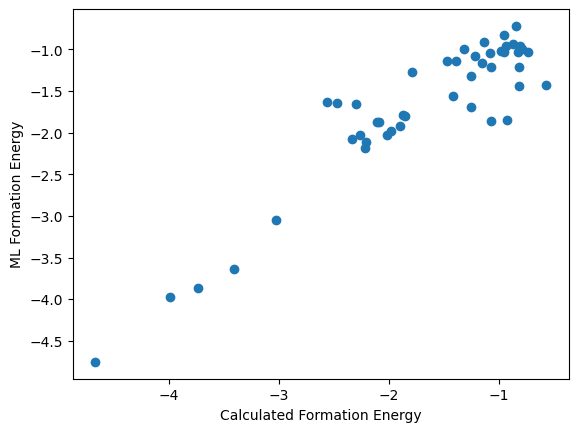

In [51]:
print(predict.shape)
print(y_test.shape)
plt.scatter(y_test, predict)
plt.xlabel("Calculated Formation Energy")
plt.ylabel("ML Formation Energy")



# SVM

In [93]:
from sklearn.svm import SVR
from sklearn import svm
from statsmodels.tools.eval_measures import mse
y = df['formation_energy'].values
X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif',
        'atomic_vol_max_dif','atomic_rad_max_dif']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

h1 = SVR(kernel = 'linear')
h1.fit(X_train, y_train)


SVR(kernel='linear')

In [94]:
y_pred = h1.predict(X_test)

In [95]:
print(mse(y_pred, y_test))

0.358146303555424


# Magnetic Moment

In [3]:
y = df['magnetic_moment'].values
X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif',
        'atomic_vol_max_dif','atomic_rad_max_dif']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 33)


print(X.shape)
print(X_train.shape)

(226, 6)
(180, 6)


In [92]:
rf_model = RandomForestRegressor(max_depth=8, random_state=0, 
                                 min_samples_leaf = 7)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)
print(predict)
print(len(rf_model.predict(X_test)))
print("R^2: ", rf_model.score(X_test, y_test))

[2.77750539 2.91938451 2.49335472 2.60603142 2.75052316 2.59806467
 2.72524152 4.51066076 2.81678243 3.07859767 2.74769078 3.04841055
 3.19019813 2.73490073 2.75352334 4.59162431 2.71211382 3.08201231
 3.05017775 4.68654919 3.06938027 3.02311409 4.68654919 2.72181951
 3.05017775 2.57899105 3.0172291  2.54014688 4.89153216 2.83194113
 2.83537463 4.45693497 3.97685875 3.61389118 2.73703289 2.69235009
 2.55014001 5.20735229 3.63262146 3.68843373 2.7804407  4.61793696
 3.88604291 2.8635905  3.06213138 5.23837727]
46
R^2:  0.854331251573111


Evaluate the following values for max_depth :  [ 1  2  3  4  5  6  7  8  9 10]


Text(0.5, 1.0, 'max_depth_values vs. R^2')

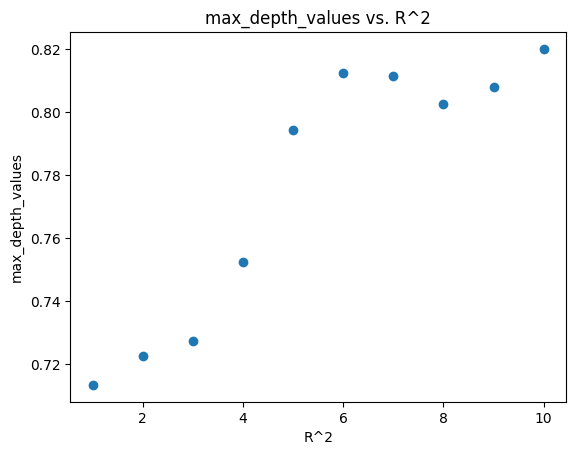

In [104]:
def hyper_search(X_train, y_train, X_val, y_val):
  """ 
  function that searches evaluates a list of hyperparameters 
  """
  max_depth_values = np.arange(10)+1
  print("Evaluate the following values for max_depth : ", max_depth_values)
  scores = []
  for ith, max_depth in enumerate(max_depth_values):
    rf_model_i = RandomForestRegressor(max_depth=max_depth, n_estimators = 5, random_state=0)
    rf_model_i.fit(X_train, y_train)
    score = rf_model_i.score(X_val, y_val)
    scores.append(score)
    # print(ith, score)
  return max_depth_values, scores

X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif']] 
X = np.asarray(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42)

max_depth_values, scores = hyper_search(X_train, y_train, X_test, y_test)
plt.scatter(max_depth_values, scores)
plt.xlabel('R^2')
plt.ylabel('max_depth_values')
plt.title('max_depth_values vs. R^2')

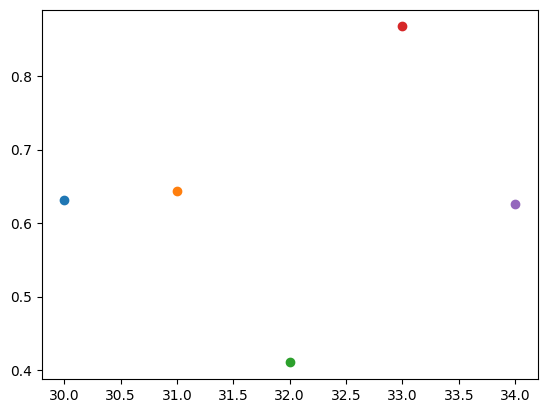

In [14]:
for i in range (30,35):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = i)
    rf_model = RandomForestRegressor(max_depth=10, 
                                 min_samples_leaf = 5)
    rf_model.fit(X_train, y_train)

    predict = rf_model.predict(X_test)
    #print("R^2: ", rf_model.score(X_test, y_test))
    plt.scatter(i, rf_model.score(X_test, y_test))

In [57]:
def success_ratio(X_test, Y_test):
    count = 0
    
    for xx, yy in zip(X_test, Y_test):
        print(xx)
        #if rf_model.predict(xx) == yy:
        #    count += 1
    return float(count/len(X_test))
#print(success_ratio(X_test, y_test))
success_ratio(X_test, y_test)


std_ion
nvalence_avg
dipole_max_dif
dipole_std_dif
atomic_vol_max_dif
atomic_rad_max_dif


0.0

(46,)
(46,)


Text(0, 0.5, 'ML Magnetic Moment')

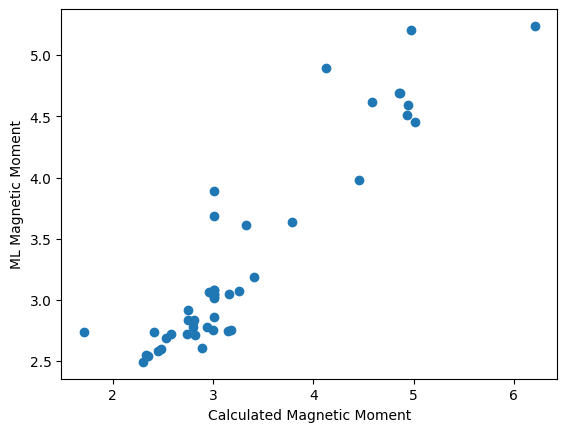

In [93]:
print(predict.shape)
print(y_test.shape)
plt.scatter(y_test, predict)
plt.xlabel("Calculated Magnetic Moment")
plt.ylabel("ML Magnetic Moment")



# CrGeTe3 J1, J2, J3, and MAE Calculation

In [3]:
((-0.19296856e2 - (-0.19537593e2))/12) * 10**3

20.061416666666904

In [66]:
FM = -31.44975284 /2
print(FM)

-15.72487642


In [67]:
NEEL = -31.41184261 /2
print(NEEL)

-15.705921305


In [68]:
ZIGZAG = -56.78992017 / 4
print(ZIGZAG)

-14.1974800425


In [69]:
STRIPY = -56.78992753 / 4
print(STRIPY)

-14.1974818825


In [70]:
dFM_NEEL = FM - NEEL
print("FM - NEEL: ", dFM_NEEL)

FM - NEEL:  -0.018955114999998912


In [71]:
dFM_ZIGZAG = FM - ZIGZAG
print("FM - ZIGZAG: ", dFM_ZIGZAG)

FM - ZIGZAG:  -1.5273963774999988


In [72]:
dFM_STRIPY = FM - STRIPY
print("FM - STRIPY: ", dFM_STRIPY)

FM - STRIPY:  -1.5273945374999993


In [80]:
J1 = 1/8 * dFM_NEEL - 1/8 * dFM_ZIGZAG + 1/8 * dFM_STRIPY
print(J1 *10**(3), "meV")

-2.3691593749999296 meV


In [81]:
J2 = -1/16 * dFM_NEEL + 1/16 * dFM_ZIGZAG + 1/16 * dFM_STRIPY
print(J2 * 10**(3), "meV")

-189.73973749999996 meV


In [82]:
J3 = 1/24 * dFM_NEEL + 1/8 * dFM_ZIGZAG - 1/8 * dFM_STRIPY
print(J3 * 10**3, "meV")

-0.7900264583332317 meV


In [46]:
# Function for exchange energy calculation
def exchange_energy(FM, NEEL, ZIGZAG, STRIPY, non_mag):
    FM, NEEL, ZIGZAG, STRIPY, non_mag = FM/4, NEEL/4, ZIGZAG/4, STRIPY/4, non_mag/4
    dFM_NEEL = FM - NEEL
    dFM_ZIGZAG = FM - ZIGZAG
    dFM_STRIPY = FM - STRIPY
    J1 = 1/8 * dFM_NEEL - 1/8 * dFM_ZIGZAG + 1/8 * dFM_STRIPY
    J2 = -1/16 * dFM_NEEL + 1/16 * dFM_ZIGZAG + 1/16 * dFM_STRIPY
    J3 = 1/24 * dFM_NEEL + 1/8 * dFM_ZIGZAG - 1/8 * dFM_STRIPY
    print(FM, NEEL, ZIGZAG, STRIPY, non_mag)
    print("FM - non_mag: ", FM - non_mag)
    print("NEEL - non_mag: ", NEEL - non_mag)
    print("ZIGZAG - non_mag: ", ZIGZAG - non_mag)
    print("STRIPY - non_mag: ", STRIPY - non_mag)
    print(J1 *10**(3), "meV")
    print(J2 * 10**(3), "meV")
    print(J3 * 10**3, "meV")
    
exchange_energy(-62.89246090, -62.81577226, -62.84706775, -62.81386412, -59.792369)

-15.723115225 -15.703943065 -15.7117669375 -15.70346603 -14.94809225
FM - non_mag:  -0.7750229750000006
NEEL - non_mag:  -0.7558508150000005
ZIGZAG - non_mag:  -0.7636746875
STRIPY - non_mag:  -0.7553737799999993
-3.4341334375000976 meV
-0.7390826562501118 meV
0.2387734375000803 meV


In [60]:
from csv import writer
import csv
import pandas as pd

List = [6, 'William', 5532, 1, 'UAE']
#exchange_energy = pd.DataFrame({"j1":[1,2,3],
#                               "j2":[3,4,5],
#                               "j3":[5,6,7]})

j1 = [1,2,3]
j2 = [2,3,4]
#df2 = pd.DataFrame(j1, columns=list('j1'))

#df = pd.read_csv('test.csv')
#np_data = df.to_numpy()
#print(np_data[0][0])
#np_data[0][1] = 2
#print(np_data)
#np_data.savetxt("test.csv", )
J2 = -0.739
J3 = 0.23877
J1 = 3
df['j1'] = [f'{J1}']
df['j2'] = [f'{J2}']
df['j3'] = [f'{J3}']
#df['j1'] = List[0]
#df['j1'].append(List[0])
df.to_csv('test.csv', mode='a', index=False, header=False)
#with open('test.csv', 'a') as f_object:
#    writer_object = writer(f_object)
#    writer_object.writerow(List)
#    writer_object.
#    f_object.close()

In [112]:
E001 = -32.27597390
E010 = -32.27456204
E100 = -32.27456222

In [113]:
print("E100 - E001 = " , round((E100 - E001) * 10**3, 5), "meV")
print("E010 - E001 = " ,round((E010 - E001) * 10**3, 5), "meV")
print("E100 - E010 = " ,round((E100 - E010) * 10**3 , 5), "meV")

E100 - E001 =  1.41168 meV
E010 - E001 =  1.41186 meV
E100 - E010 =  -0.00018 meV


In [28]:
print("E100 - E001 = " ,E100 - E001)
print("E100 - E010 = " ,E100 - E010)

E100 - E001 =  -0.0020610000000047535
E100 - E010 =  -0.0007440000000045188


# NiO MAE Calculation

In [43]:
E111 = -0.19615426 * 10**2
E110 = -0.19615441 * 10**2
E001 = -0.19615434 * 10**2

In [45]:
print("E110 - E001 = " ,E110 - E001)
print("E111 - E001 = " ,E111 - E001)

E110 - E001 =  -7.000000000090267e-06
E111 - E001 =  8.000000001118224e-06


# VI3 J1 J2 J3 Calculation

In [13]:
FM = -0.30723499 * 10**2 / 2
NEEL = -0.30567275 * 10**2 / 2
STRIPE = -0.61208 * 10**2 / 4
ZIGZAG = -0.61448 * 10**2 / 4

In [14]:
print("FM: ", FM)
print("NEEL: ", NEEL)
print("STRIPE: ", STRIPE)
print("ZIGZAG: ", ZIGZAG)

FM:  -15.361749499999998
NEEL:  -15.2836375
STRIPE:  -15.302
ZIGZAG:  -15.362


In [15]:
dNEEL_FM = NEEL - FM
dZIGZAG_FM = ZIGZAG - FM
dSTRIPE_FM = STRIPE - FM

In [16]:
J1 = 1/8 * dNEEL_FM - 1/8 * dZIGZAG_FM + 1/8 * dSTRIPE_FM
J2 = -1/16 * dNEEL_FM + 1/16 * dZIGZAG_FM + 1/16 * dSTRIPE_FM
J3 = 1/24 * dNEEL_FM + 1/8 * dZIGZAG_FM - 1/8 * dSTRIPE_FM

In [17]:
print("J1: ", J1)
print("J2: ", J2)
print("J3: ", J3)

J1:  0.017263999999999946
J2:  -0.0011633125000001243
J3:  -0.004245333333333434


In [12]:
import pandas as pd
df = pd.read_csv('test_data.csv')
print(df.column)
print(type(df))

AttributeError: 'DataFrame' object has no attribute 'column'

In [17]:
test001 = -48.99538293
test010 = -48.99567606
test100 = -48.99567610

In [18]:
print("E100 - E001 = " , round((test100 - test001) * 1000, 5), "meV")
print("E010 - E001 = " ,round((test010 - test001) * 1000, 5), "meV")
print("E100 - E010 = " ,round((test100 - test010) * 1000, 5), "meV")

E100 - E001 =  -0.29317 meV
E010 - E001 =  -0.29313 meV
E100 - E010 =  -4e-05 meV


In [ ]:
E100 - E001 =  -0.29358 meV
E010 - E001 =  -0.29352 meV
E100 - E010 =  -6e-05 meV


# Pyxtal Generate POSCAR File

In [118]:
import pandas as pd
import numpy as np
a = pd.read_csv('tmp/springer_database.csv', sep = ",")
tmp = ["12", "34"]
#print(a)
a_to_array = np.array(a)
print(type(a_to_array[0][1]))
a_list = a_to_array[0][1].split()
print(type(a_to_array[0][1].split()))
print(a_list[1])
print(a_list)

#print(a.iloc[0])
#print(a['Element'][0][0])
#print(a.iloc[0]['Element'][0])
#print(type(a.iloc[0]['Ix']))

<class 'str'>
<class 'list'>
I
['Cr', 'I']


### Generate CI3 Space Group 148 POSCAR File

In [49]:
from pyxtal import pyxtal
from pyxtal.lattice import Lattice
import pandas as pd
import numpy as np

df = pd.read_csv('tmp/springer_database.csv')

struc = pyxtal()
spg = 148
composition = [6,18]
α = 90
β = 90
γ = 120

for i in range(1):
    ix = df.iloc[i]['Ix']
    iy = df.iloc[i]['Iy']
    iz = df.iloc[i]['Iz']
    Crz = df.iloc[i]['Crz']
    a = df.iloc[i]['a']
    c = df.iloc[i]['c']
    name = df.iloc[i]['Compound']

    cell = Lattice.from_para(a, a*2, c, α, β, γ, ltype = 'Orthorhombic')
    sites = [{"6c": [0, 0, Crz],},{"18f": [ix, iy, iz]}]

    df_to_array = np.array(df)
    element = df_to_array[i][1].split()
    print(element)
    struc.from_random(3, spg, element, composition, lattice=cell, sites=sites)
    #print(struc)
    #struc.resort_species(element)
    #print(struc.atom_sites)
    #print(struc)
    struc.to_file(f"{name}_ortho.poscar", fmt='poscar', sym_num=1)
#print(len(df))

['Cr', 'I']


In [10]:
from pyxtal import pyxtal
from pyxtal.lattice import Lattice
import pandas as pd
import numpy as np

df = pd.read_csv('tmp/springer_database.csv')

struc = pyxtal()
spg = 148
composition = [6,18]
α = 90
β = 90
γ = 120

for i in range(2):
    ix = df.iloc[i]['Ix']
    iy = df.iloc[i]['Iy']
    iz = df.iloc[i]['Iz']
    Crz = df.iloc[i]['Crz']
    a = df.iloc[i]['a']
    c = df.iloc[i]['c']
    name = df.iloc[i]['Compound']

    cell = Lattice.from_para(a, a, c, α, β, γ, ltype = 'hexagonal')
    sites = [{"6c": [0, 0, Crz],},{"18f": [ix, iy, iz]}]

    df_to_array = np.array(df)
    element = df_to_array[i][1].split()
    print(element)
    struc.from_random(3, spg, element, composition, lattice=cell, sites=sites)
    print(struc)
    #struc.resort_species(element)
    print(struc.atom_sites)
    #print(struc)
    #struc.to_file(f"{name}.poscar", fmt='poscar', sym_num=1)
#print(len(df))

['Cr', 'I']

------Crystal from random------
Dimension: 3
Composition: Cr6I18
Group: R -3:H (148)
  6.8670,   6.8670,  19.8070,  90.0000,  90.0000, 120.0000, hexagonal
Wyckoff sites:
	Cr @ [ 0.0000  0.0000  0.1663], WP [6c] Site [3..]
	 I @ [ 0.3345  0.0178  0.0877], WP [18f] Site [1]
[Cr @ [ 0.0000  0.0000  0.1663], WP [6c] Site [3..],  I @ [ 0.3345  0.0178  0.0877], WP [18f] Site [1]]
['Cr', 'Br']

------Crystal from random------
Dimension: 3
Composition: Cr6Br18
Group: R -3:H (148)
  6.2600,   6.2600,  18.2000,  90.0000,  90.0000, 120.0000, hexagonal
Wyckoff sites:
	Cr @ [ 0.0000  0.0000  0.1667], WP [6c] Site [3..]
	Br @ [ 0.3333  0.0000  0.0890], WP [18f] Site [1]
[Cr @ [ 0.0000  0.0000  0.1667], WP [6c] Site [3..], Br @ [ 0.3333  0.0000  0.0890], WP [18f] Site [1]]


In [52]:
for i in range(2):
    ix = df.iloc[i]['Ix']
    iy = df.iloc[i]['Iy']
    iz = df.iloc[i]['Iz']
    Crz = df.iloc[i]['Crz']
    a = df.iloc[i]['a']
    c = df.iloc[i]['c']
    cell = Lattice.from_para(a, a, c, α, β, γ, ltype = 'hexagonal')
	sites = [{"6c": [0, 0, Crz],},{"18f": [ix, iy, iz]}]
	df_to_array = np.array(df)
	element = df_to_array[i][1].split()
    print(element)
	struc.from_random(3, spg, element, composition, lattice=cell, sites=sites)
    print(struc)

TabError: inconsistent use of tabs and spaces in indentation (3394304864.py, line 9)

In [ ]:
from pyxtal import pyxtal
from pyxtal.lattice import Lattice
struc = pyxtal()
cell = Lattice.from_para(a, a, c, α, β, γ, ltype = 'hexagonal')
spg = 148
sites = [{"6c": [0, 0, Crz],},{"18f": [ix, iy, iz]}]
element = ['Cr', 'I']
composition = [6,18]
struc.from_random(3, spg, element, composition, lattice=cell, sites=sites)
struc

In [15]:
ix = df.iloc[i]['Ix']
print(type(ix))

<class 'numpy.float64'>


In [11]:
element = df_to_array[0][1].split()
print(element)

['Cr', 'I']


In [6]:
from pyxtal import pyxtal
from pyxtal.lattice import Lattice
struc = pyxtal()
cell = Lattice.from_para(6.867, 6.867, 19.807, 90, 90, 120, ltype='hexagonal')
spg = 148
sites = [{"6c": [0, 0, 0.16632],
         },
         {"18f": [0.33453, 0.01776, 0.0877]},
        ]
element = ['Cr', 'I']
composition = [6,18]
struc.from_random(3, spg, element, composition, lattice=cell, sites=sites)
struc


------Crystal from random------
Dimension: 3
Composition: Cr6I18
Group: R -3:H (148)
  6.8670,   6.8670,  19.8070,  90.0000,  90.0000, 120.0000, hexagonal
Wyckoff sites:
	Cr @ [ 0.0000  0.0000  0.1663], WP [6c] Site [3..]
	 I @ [ 0.3345  0.0178  0.0877], WP [18f] Site [1]

In [61]:
from pyxtal.symmetry import Group
g = Group(148)
g.Wyckoff_positions

[Wyckoff position 18f in space group 148 with site symmetry 1
 x, y, z
 -y, x-y, z
 -x+y, -x, z
 -x, -y, -z
 y, -x+y, -z
 x-y, x, -z
 x+2/3, y+1/3, z+1/3
 -y+2/3, x-y+1/3, z+1/3
 -x+y+2/3, -x+1/3, z+1/3
 -x+2/3, -y+1/3, -z+1/3
 y+2/3, -x+y+1/3, -z+1/3
 x-y+2/3, x+1/3, -z+1/3
 x+1/3, y+2/3, z+2/3
 -y+1/3, x-y+2/3, z+2/3
 -x+y+1/3, -x+2/3, z+2/3
 -x+1/3, -y+2/3, -z+2/3
 y+1/3, -x+y+2/3, -z+2/3
 x-y+1/3, x+2/3, -z+2/3,
 Wyckoff position 9e in space group 148 with site symmetry -1
 1/2, 0, 0
 0, 1/2, 0
 1/2, 1/2, 0
 7/6, 1/3, 1/3
 2/3, 5/6, 1/3
 7/6, 5/6, 1/3
 5/6, 2/3, 2/3
 1/3, 7/6, 2/3
 5/6, 7/6, 2/3,
 Wyckoff position 9d in space group 148 with site symmetry -1
 1/2, 0, 1/2
 0, 1/2, 1/2
 1/2, 1/2, 1/2
 7/6, 1/3, 5/6
 2/3, 5/6, 5/6
 7/6, 5/6, 5/6
 5/6, 2/3, 7/6
 1/3, 7/6, 7/6
 5/6, 7/6, 7/6,
 Wyckoff position 6c in space group 148 with site symmetry 3 . .
 0, 0, z
 0, 0, -z
 2/3, 1/3, z+1/3
 2/3, 1/3, -z+1/3
 1/3, 2/3, z+2/3
 1/3, 2/3, -z+2/3,
 Wyckoff position 3b in space group 148 wit

In [62]:
struc.to_file('tmp_cri3_5.cif', fmt='cif')

In [41]:
from pyxtal.lattice import Lattice
cell = Lattice.from_para(7.8758, 7.9794, 5.6139, 90, 90, 90, ltype='orthorhombic')
spg = 58
elements = ['Al', 'Si', 'O']
composition = [8, 4, 20]

#sites = [{"4e": [0.0000, 0.0000, 0.2418],
#          "4g": [0.1294, 0.6392, 0.0000],
#         },
#         {"4g": [0.2458, 0.2522, 0.0000]},
#         {"4g": [0.4241, 0.3636, 0.0000]}, #partial information on O sites
#        ]

s = pyxtal()
s.from_random(3, spg, elements, composition, lattice=cell)#, sites=sites)
print(s)


------Crystal from random------
Dimension: 3
Composition: Si4O20Al8
Group: P n n m (58)
  7.8758,   7.9794,   5.6139,  90.0000,  90.0000,  90.0000, orthorhombic
Wyckoff sites:
	Al @ [ 0.0991  0.7555  0.0000], WP [4g] Site [..m]
	Al @ [ 0.0000  0.0000  0.5000], WP [2b] Site [..2/m]
	Al @ [ 0.0000  0.0000  0.0000], WP [2a] Site [..2/m]
	Si @ [ 0.0000  0.5000  0.0000], WP [2c] Site [..2/m]
	Si @ [ 0.0000  0.5000  0.5000], WP [2d] Site [..2/m]
	 O @ [ 0.2881  0.1662  0.6140], WP [8h] Site [1]
	 O @ [ 0.5126  0.2628  0.1159], WP [8h] Site [1]
	 O @ [ 0.0000  0.5000  0.8328], WP [4f] Site [..2]


In [42]:
s.to_file('tmp_alsio_2.poscar', fmt='poscar')

In [16]:
x = 0.33453
y = 0.01776
z = 0.0877
print("x, y, z ",x, y, z)
print("-y, x-y, z ",-y, x-y, z)
print("-x+y, -x, z ",-x+y, -x, z)
print("-x, -y, -z ",-x, -y, -z)
print("y, -x+y, -z ",y, -x+y, -z)
print("x-y, x, -z ",x-y, x, -z)
print("x+2/3, y+1/3, z+1/3 ",x+2/3, y+1/3, z+1/3)
print("-y+2/3, x-y+1/3, z+1/3 ",-y+2/3, x-y+1/3, z+1/3)
print("-x+y+2/3, -x+1/3, z+1/3 ",-x+y+2/3, -x+1/3, z+1/3)
print("-x+2/3, -y+1/3, -z+1/3 ",-x+2/3, -y+1/3, -z+1/3)
print("y+2/3, -x+y+1/3, -z+1/3 ",y+2/3, -x+y+1/3, -z+1/3)
print("x-y+2/3, x+1/3, -z+1/3 ",x-y+2/3, x+1/3, -z+1/3)
print("x+1/3, y+2/3, z+2/3 ",x+1/3, y+2/3, z+2/3)
print("-y+1/3, x-y+2/3, z+2/3 ",-y+1/3, x-y+2/3, z+2/3)
print("-x+y+1/3, -x+2/3, z+2/3 ",-x+y+1/3, -x+2/3, z+2/3)
print("-x+1/3, -y+2/3, -z+2/3 ",-x+1/3, -y+2/3, -z+2/3)
print("y+1/3, -x+y+2/3, -z+2/3 ",y+1/3, -x+y+2/3, -z+2/3)
print("x-y+1/3, x+2/3, -z+2/3 ",x-y+1/3, x+2/3, -z+2/3)

x, y, z  0.33453 0.01776 0.0877
-y, x-y, z  -0.01776 0.31677 0.0877
-x+y, -x, z  -0.31677 -0.33453 0.0877
-x, -y, -z  -0.33453 -0.01776 -0.0877
y, -x+y, -z  0.01776 -0.31677 -0.0877
x-y, x, -z  0.31677 0.33453 -0.0877
x+2/3, y+1/3, z+1/3  1.0011966666666665 0.3510933333333333 0.4210333333333333
-y+2/3, x-y+1/3, z+1/3  0.6489066666666666 0.6501033333333333 0.4210333333333333
-x+y+2/3, -x+1/3, z+1/3  0.34989666666666663 -0.0011966666666666792 0.4210333333333333
-x+2/3, -y+1/3, -z+1/3  0.33213666666666664 0.3155733333333333 0.24563333333333331
y+2/3, -x+y+1/3, -z+1/3  0.6844266666666666 0.01656333333333332 0.24563333333333331
x-y+2/3, x+1/3, -z+1/3  0.9834366666666666 0.6678633333333333 0.24563333333333331
x+1/3, y+2/3, z+2/3  0.6678633333333333 0.6844266666666666 0.7543666666666666
-y+1/3, x-y+2/3, z+2/3  0.3155733333333333 0.9834366666666666 0.7543666666666666
-x+y+1/3, -x+2/3, z+2/3  0.01656333333333332 0.33213666666666664 0.7543666666666666
-x+1/3, -y+2/3, -z+2/3  -0.00119666666666667

## Generate CrGeTe3 POSCAR File

In [16]:
from pyxtal import pyxtal
from pyxtal.lattice import Lattice
import pandas as pd
import numpy as np

df = pd.read_csv('tmp/springer_database.csv')

struc = pyxtal()
spg = 148
composition = [6,6,18]
α = 90
β = 90
γ = 120

#for i in range(1):
ix = df.iloc[6]['Ix']
iy = df.iloc[6]['Iy']
iz = df.iloc[6]['Iz']
Crz = df.iloc[6]['Crz']
Bz = df.iloc[6]['Bz']
a = df.iloc[6]['a']
c = df.iloc[6]['c']
name = df.iloc[6]['Compound']

cell = Lattice.from_para(a, a, c, α, β, γ, ltype = 'Hexagonal')
sites = [{"6c": [0, 0, Crz]},{"6c": [0, 0, Bz]}, {"18f": [ix, iy, iz]}]

df_to_array = np.array(df)
element = df_to_array[6][1].split()
print(element)
struc.from_random(3, spg, element, composition, lattice=cell, sites=sites)
print(struc)
    #print(struc)
    #struc.resort_species(element)
    #print(struc.atom_sites)
    #print(struc)
struc.to_file(f"{name}_crgete3.poscar", fmt='poscar', sym_num=1)
#print(len(df))

['Cr', 'Ge', 'Te']

------Crystal from random------
Dimension: 3
Composition: Cr6Ge6Te18
Group: R -3:H (148)
  6.8196,   6.8196,  20.3710,  90.0000,  90.0000, 120.0000, Hexagonal
Wyckoff sites:
	Cr @ [ 0.0000  0.0000  0.3339], WP [6c] Site [3..]
	Ge @ [ 0.0000  0.0000  0.0601], WP [6c] Site [3..]
	Te @ [ 0.0017  0.3693  0.0834], WP [18f] Site [1]


## Generic CrGeTe3 POSCAR File

In [23]:
import ase, ase.io
import numpy as np
poscar = ase.io.read('CrGeTe3_crgete3_monolayer_cut.vasp', format='vasp')

cr_x, cr_y, cr_z = 0, 0, 0.3339
b_x, b_y, b_z = 0, 0, 0.0601
i_x, i_y, i_z = 0.00167, 0.36933, 0.08343


wyckoff = np.zeros([10,3])

wyckoff[0][0], wyckoff[0][1], wyckoff[0][2] = cr_x, cr_y, cr_z
wyckoff[1][0], wyckoff[1][1], wyckoff[1][2] = 1/3, 2/3, -cr_z + 2/3

wyckoff[2][0], wyckoff[2][1], wyckoff[2][2] = 2/3, 1/3, b_z+1/3
wyckoff[3][0], wyckoff[3][1], wyckoff[3][2] = 2/3, 1/3, -b_z+1/3

wyckoff[4][0], wyckoff[4][1], wyckoff[4][2] = i_x+2/3, i_y+1/3, i_z+1/3
wyckoff[5][0], wyckoff[5][1], wyckoff[5][2] = -i_y+2/3, i_x-i_y+1/3, i_z+1/3
wyckoff[6][0], wyckoff[6][1], wyckoff[6][2] = -i_x+i_y+2/3, -i_x+1/3, i_z+1/3
wyckoff[7][0], wyckoff[7][1], wyckoff[7][2] = -i_x+2/3, -i_y+1/3, -i_z+1/3
wyckoff[8][0], wyckoff[8][1], wyckoff[8][2] = i_y+2/3, -i_x+i_y+1/3, -i_z+1/3
wyckoff[9 ][0], wyckoff[9][1], wyckoff[9][2] = i_x-i_y+2/3, i_x+1/3, -i_z+1/3



#print(poscar.positions)
for i in range(len(poscar.positions)):
    for j in range(3):
        poscar.positions[i][j] = wyckoff[i][j]

#print(poscar.positions)
#print(poscar.cell)
#print(type(poscar))


#x = 2
#poscar.positions[0][0] = x
#print(poscar.positions[0])
#print(type(poscar.positions))
#ase.io.write("poscar_new1.vasp", poscar, format="vasp")
#filename = "poscar_new1.vasp"
#myfile = open(filename, 'w')
#myfile.write(label + '\n')
fin = open("poscar_new1.vasp", "rt")
data = fin.read()
data = data.replace('Cartesian', 'direct')
fin.close()
fin = open("poscar_new1.vasp", "wt")
fin.write(data)
fin.close()


ase.io.vasp.write_vasp("poscar_crgete3_new2.vasp", poscar, direct=False)

In [42]:
crz = 0.3339
print(-crz+2/3)
gez = 0.0601
print(gez+1/3)
print(-gez+1/3)
x = 0.00167
y = 0.36933
z = 0.08343

print("x, y, z ",x, y, z)
print("-y, x-y, z ",-y, x-y, z)
print("-x+y, -x, z ",-x+y, -x, z)
print("")

print("-x, -y, -z ",-x, -y, -z)
print("y, -x+y, -z ",y, -x+y, -z)
print("x-y, x, -z ",x-y, x, -z)
print("")

print("x+2/3, y+1/3, z+1/3 ",x+2/3, y+1/3, z+1/3)
print("-y+2/3, x-y+1/3, z+1/3 ",-y+2/3, x-y+1/3, z+1/3)
print("-x+y+2/3, -x+1/3, z+1/3 ",-x+y+2/3, -x+1/3, z+1/3)
print("")

print("-x+2/3, -y+1/3, -z+1/3 ",-x+2/3, -y+1/3, -z+1/3)
print("y+2/3, -x+y+1/3, -z+1/3 ",y+2/3, -x+y+1/3, -z+1/3)
print("x-y+2/3, x+1/3, -z+1/3 ",x-y+2/3, x+1/3, -z+1/3)
print("")

print("x+1/3, y+2/3, z+2/3 ",x+1/3, y+2/3, z+2/3)
print("-y+1/3, x-y+2/3, z+2/3 ",-y+1/3, x-y+2/3, z+2/3)
print("-x+y+1/3, -x+2/3, z+2/3 ",-x+y+1/3, -x+2/3, z+2/3)
print("")

print("-x+1/3, -y+2/3, -z+2/3 ",-x+1/3, -y+2/3, -z+2/3)
print("y+1/3, -x+y+2/3, -z+2/3 ",y+1/3, -x+y+2/3, -z+2/3)
print("x-y+1/3, x+2/3, -z+2/3 ",x-y+1/3, x+2/3, -z+2/3)

0.33276666666666666
0.3934333333333333
0.27323333333333333
x, y, z  0.00167 0.36933 0.08343
-y, x-y, z  -0.36933 -0.36766 0.08343
-x+y, -x, z  0.36766 -0.00167 0.08343

-x, -y, -z  -0.00167 -0.36933 -0.08343
y, -x+y, -z  0.36933 0.36766 -0.08343
x-y, x, -z  -0.36766 0.00167 -0.08343

x+2/3, y+1/3, z+1/3  0.6683366666666666 0.7026633333333333 0.4167633333333333
-y+2/3, x-y+1/3, z+1/3  0.29733666666666664 -0.03432666666666667 0.4167633333333333
-x+y+2/3, -x+1/3, z+1/3  1.0343266666666666 0.3316633333333333 0.4167633333333333

-x+2/3, -y+1/3, -z+1/3  0.6649966666666667 -0.03599666666666668 0.2499033333333333
y+2/3, -x+y+1/3, -z+1/3  1.0359966666666667 0.7009933333333334 0.2499033333333333
x-y+2/3, x+1/3, -z+1/3  0.29900666666666664 0.3350033333333333 0.2499033333333333

x+1/3, y+2/3, z+2/3  0.3350033333333333 1.0359966666666667 0.7500966666666666
-y+1/3, x-y+2/3, z+2/3  -0.03599666666666668 0.29900666666666664 0.7500966666666666
-x+y+1/3, -x+2/3, z+2/3  0.7009933333333334 0.66499666666666

In [55]:
print(np.sqrt(5.9469964477877415**2 + 3.4335**2 + 0**2))
print(np.sqrt(5.946996447877415**2 + (-10.300499999999)**2 + 0**2))
print(np.sqrt(19.806999999999**2))
a = np.array([5.9469964477877415 , 3.4335])
b = np.array([5.946996447877415, -10.300499999999])
print(np.dot(a,b))


6.867000000000001
11.893992895619451
19.806999999999
5.367368364890269e-10


## Generate CrGeTe3 Supercell POSCAR File

In [27]:
from pyxtal import pyxtal
from pyxtal.lattice import Lattice
import pandas as pd
import numpy as np
#from ase.build.supercells import make_supercell
from ase.io import write


df = pd.read_csv('tmp/springer_database.csv')

struc = pyxtal()
spg = 148
composition = [6,6,18]
α = 90
β = 90
γ = 120
ase_struc = []
p = [[1,1,0],[1,-1,0],[0,0,1]]


ix = df.iloc[6]['Ix']
iy = df.iloc[6]['Iy']
iz = df.iloc[6]['Iz']
Crz = df.iloc[6]['Crz']
Bz = df.iloc[6]['Bz']
a = df.iloc[6]['a']
c = df.iloc[6]['c']
name = df.iloc[6]['Compound']

cell = Lattice.from_para(a, a, c, α, β, γ, ltype = 'hexagonal')
sites = [{"6c": [0, 0, Crz]},{"6c": [0, 0, Bz]}, {"18f": [ix, iy, iz]}]

df_to_array = np.array(df)
element = df_to_array[6][1].split()
print(element)
struc.from_random(3, spg, element, composition, lattice=cell, sites=sites)
ase_struc = struc.to_ase()
    
supercell = make_supercell(ase_struc, p, order='atom-major')
print(supercell)
write(f"{name}_a+b_supercell_local_function.poscar", supercell, vasp5=True, sort=True, direct=True)
    #print("Type of the supercell:", repr(supercell))
    #ase_struc *= [2,1,1]
    #print(ase_struc)
    #print(ase_struc)
    #ase_struc.write(f"{name}.vasp", vasp5=True, format='vasp', direct=True)
    #supercell.write(f"{name}_2x1x1_atom_major.vasp", vasp5=True, format='vasp', direct=True)
    #struc.resort_species(element)
    #print(struc.atom_sites)
    #print(struc)
    #struc.to_file(f"{name}.poscar", fmt='poscar', sym_num=1)
#print(len(df))

['Cr', 'Ge', 'Te']
Atoms(symbols='Cr12Ge12Te36', pbc=True, cell=[[5.905946843648359, 3.409800000000002, 0.0], [5.905946843648359, -10.229399999999998, 0.0], [0.0, 0.0, 20.371]])


In [30]:
a1 = np.array([   5.9059468436483593,   -3.4097999999999984,    0.0000000000000004])
a2 = np.array([   0.0000000000000000,    6.8196000000000003,    0.0000000000000004])
a1_prime = a1+a2
a2_prime = a1-a2
print(a1_prime)
print(a2_prime)

[5.90594684e+00 3.40980000e+00 8.00000000e-16]
[  5.90594684 -10.2294       0.        ]


In [33]:
# change basis for crgete3 supercell

def old_to_new(a1,a2,a1_prime, a2_prime, n):
    a = np.array([a1,a2])
    a_prime = np.array([a1_prime, a2_prime])
    a_prime_inv = np.linalg.inv(a_prime)
    n_dot_a = np.dot(n,a)
    return np.dot(n_dot_a, a_prime_inv)

def new_to_old(a1,a2,a1_prime, a2_prime, n_prime):
    a = np.array([a1,a2])
    a_prime = np.array([a1_prime, a2_prime])
    a_inv = np.linalg.inv(a)
    n_prime_dot_a_prime = np.dot(n_prime, a_prime)
    return np.dot(n_prime_dot_a_prime, a_inv)
    
    
a1 = np.array([5.9059468436483593,   -3.4097999999999984])
a2 = np.array([0.0000000000000000,    6.8196000000000003]) 
a1_prime = np.array([5.9059468436483593,    3.4098000000000019])
a2_prime = np.array([5.9059468436483593,  -10.2293999999999983])

   

In [36]:
# crgete3 change basis from new basis to old basis
cr1=np.array([0.0000000000000000, -0.0000000000000000])
cr2=np.array([0.0000000000000001,  0.3333333333333333]) 
cr3=np.array([0.5000000000000000,  0.8333333333333334])
cr4=np.array([0.4999999999999999,  0.4999999999999999])

ge1=np.array([0.0000000000000003,  0.6666666666666666])
ge2=np.array([0.5000000000000001,  0.1666666666666667])
ge3=np.array([0.5000000000000001,  0.1666666666666667])
ge4=np.array([0.0000000000000003,  0.6666666666666666])



i1=np.array([0.1855000000000003,  0.4828366666666665])
i2=np.array([0.1315050000000000,  0.1658316666666667])
i3=np.array([0.6315050000000002,  0.6658316666666665])

i4=np.array([0.6855000000000003,  0.9828366666666666])
i5=np.array([0.1829950000000002,  0.8513316666666666]) 
i6=np.array([0.3145000000000002,  0.3504966666666666]) 

i7=np.array([0.8145000000000001,  0.8504966666666667])
i8=np.array([0.3170049999999999,  0.9820016666666667])
i9=np.array([0.8170050000000002,  0.4820016666666666])

i10=np.array([0.8684950000000002,  0.1675016666666667])
i11=np.array([0.3684950000000004,  0.6675016666666665])
i12=np.array([0.6829950000000001,  0.3513316666666667])

print("cr1: ", new_to_old(a1,a2,a1_prime, a2_prime, cr1))
print("cr2: ", new_to_old(a1,a2,a1_prime, a2_prime, cr2))
print("cr3: ", new_to_old(a1,a2,a1_prime, a2_prime, cr3))
print("cr4: ", new_to_old(a1,a2,a1_prime, a2_prime, cr4))

print("")

print("ge1: ", new_to_old(a1,a2,a1_prime, a2_prime, ge1))
print("ge2: ", new_to_old(a1,a2,a1_prime, a2_prime, ge2))
print("ge3: ", new_to_old(a1,a2,a1_prime, a2_prime, ge3))
print("ge4: ", new_to_old(a1,a2,a1_prime, a2_prime, ge4))

print("")

print("i1: ", new_to_old(a1,a2,a1_prime, a2_prime, i1))
print("i2: ", new_to_old(a1,a2,a1_prime, a2_prime, i2))
print("i3: ", new_to_old(a1,a2,a1_prime, a2_prime, i3))
print("i4: ", new_to_old(a1,a2,a1_prime, a2_prime, i4))
print("i5: ", new_to_old(a1,a2,a1_prime, a2_prime, i5))
print("i6: ", new_to_old(a1,a2,a1_prime, a2_prime, i6))
print("i7: ", new_to_old(a1,a2,a1_prime, a2_prime, i7))
print("i8: ", new_to_old(a1,a2,a1_prime, a2_prime, i8))
print("i9: ", new_to_old(a1,a2,a1_prime, a2_prime, i9))
print("i10: ", new_to_old(a1,a2,a1_prime, a2_prime, i10))
print("i11: ", new_to_old(a1,a2,a1_prime, a2_prime, i11))
print("i12: ", new_to_old(a1,a2,a1_prime, a2_prime, i12))

cr1:  [0. 0.]
cr2:  [ 0.33333333 -0.33333333]
cr3:  [ 1.33333333 -0.33333333]
cr4:  [1.000000e+00 1.167323e-16]

ge1:  [ 0.66666667 -0.66666667]
ge2:  [0.66666667 0.33333333]
ge3:  [0.66666667 0.33333333]
ge4:  [ 0.66666667 -0.66666667]

i1:  [ 0.66833667 -0.29733667]
i2:  [ 0.29733667 -0.03432667]
i3:  [ 1.29733667 -0.03432667]
i4:  [ 1.66833667 -0.29733667]
i5:  [ 1.03432667 -0.66833667]
i6:  [ 0.66499667 -0.03599667]
i7:  [ 1.66499667 -0.03599667]
i8:  [ 1.29900667 -0.66499667]
i9:  [1.29900667 0.33500333]
i10:  [1.03599667 0.70099333]
i11:  [ 1.03599667 -0.29900667]
i12:  [1.03432667 0.33166333]


### Generate CrI3 Supercell POSCAR file

In [24]:
from ase import Atoms


def clean_matrix(matrix, eps=1e-12):
    """ clean from small values"""
    matrix = np.array(matrix)
    for ij in np.ndindex(matrix.shape):
        if abs(matrix[ij]) < eps:
            matrix[ij] = 0
    return matrix

def lattice_points_in_supercell(supercell_matrix):
    """Find all lattice points contained in a supercell.
    Adapted from pymatgen, which is available under MIT license:
    The MIT License (MIT) Copyright (c) 2011-2012 MIT & The Regents of the
    University of California, through Lawrence Berkeley National Laboratory
    """

    diagonals = np.array([
        [0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1],
    ])
    d_points = np.dot(diagonals, supercell_matrix)

    mins = np.min(d_points, axis=0)
    maxes = np.max(d_points, axis=0) + 1

    ar = np.arange(mins[0], maxes[0])[:, None] * np.array([1, 0, 0])[None, :]
    br = np.arange(mins[1], maxes[1])[:, None] * np.array([0, 1, 0])[None, :]
    cr = np.arange(mins[2], maxes[2])[:, None] * np.array([0, 0, 1])[None, :]

    all_points = ar[:, None, None] + br[None, :, None] + cr[None, None, :]
    all_points = all_points.reshape((-1, 3))

    frac_points = np.dot(all_points, np.linalg.inv(supercell_matrix))

    tvects = frac_points[np.all(frac_points < 1 - 1e-10, axis=1)
                         & np.all(frac_points >= -1e-10, axis=1)]
    assert len(tvects) == round(abs(np.linalg.det(supercell_matrix)))
    return tvects


def make_supercell(prim, P, *, wrap=True, order="cell-major", tol=1e-5):
    r"""Generate a supercell by applying a general transformation (*P*) to
    the input configuration (*prim*).
    The transformation is described by a 3x3 integer matrix
    `\mathbf{P}`. Specifically, the new cell metric
    `\mathbf{h}` is given in terms of the metric of the input
    configuration `\mathbf{h}_p` by `\mathbf{P h}_p =
    \mathbf{h}`.
    Parameters:
    prim: ASE Atoms object
        Input configuration.
    P: 3x3 integer matrix
        Transformation matrix `\mathbf{P}`.
    wrap: bool
        wrap in the end
    order: str (default: "cell-major")
        how to order the atoms in the supercell
        "cell-major":
        [atom1_shift1, atom2_shift1, ..., atom1_shift2, atom2_shift2, ...]
        i.e. run first over all the atoms in cell1 and then move to cell2.
        "atom-major":
        [atom1_shift1, atom1_shift2, ..., atom2_shift1, atom2_shift2, ...]
        i.e. run first over atom1 in all the cells and then move to atom2.
        This may be the order preferred by most VASP users.
    tol: float
        tolerance for wrapping
    """

    supercell_matrix = P
    supercell = clean_matrix(supercell_matrix @ prim.cell)

    # cartesian lattice points
    lattice_points_frac = lattice_points_in_supercell(supercell_matrix)
    lattice_points = np.dot(lattice_points_frac, supercell)
    N = len(lattice_points)

    if order == "cell-major":
        shifted = prim.positions[None, :, :] + lattice_points[:, None, :]
    elif order  == "atom-major":
        shifted = prim.positions[:, None, :] + lattice_points[None, :, :]
    else:
        raise ValueError(f"invalid order: {order}")
    shifted_reshaped = shifted.reshape(-1, 3)

    superatoms = Atoms(positions=shifted_reshaped,
                       cell=supercell,
                       pbc=prim.pbc)

    # Copy over any other possible arrays, inspired by atoms.__imul__
    for name, arr in prim.arrays.items():
        if name == "positions":
            # This was added during construction of the super cell
            continue
        shape = (N * arr.shape[0], *arr.shape[1:])
        if order == "cell-major":
            new_arr = np.repeat(arr[None, :], N, axis=0).reshape(shape)
        elif order == "atom-major":
            new_arr = np.repeat(arr[:, None], N, axis=1).reshape(shape)
        superatoms.set_array(name, new_arr)

    # check number of atoms is correct
    n_target = abs(int(np.round(np.linalg.det(supercell_matrix) * len(prim))))
    if n_target != len(superatoms):
        msg = "Number of atoms in supercell: {}, expected: {}".format(
            n_target, len(superatoms))
        raise SupercellError(msg)

    if wrap:
        superatoms.wrap(eps=tol)

    return superatoms

In [83]:
from pyxtal import pyxtal
from pyxtal.lattice import Lattice
import pandas as pd
import numpy as np
#from ase.build.supercells import make_supercell
from ase.io import write


df = pd.read_csv('tmp/springer_database.csv')

struc = pyxtal()
spg = 148
composition = [6,18]
α = 90
β = 90
γ = 120
ase_struc = []
p = [[1,1,0],[1,-1,0],[0,0,1]]

for i in range(1):
    ix = df.iloc[i]['Ix']
    iy = df.iloc[i]['Iy']
    iz = df.iloc[i]['Iz']
    Crz = df.iloc[i]['Crz']
    a = df.iloc[i]['a']
    c = df.iloc[i]['c']
    name = df.iloc[i]['Compound']

    cell = Lattice.from_para(a, a, c, α, β, γ, ltype = 'hexagonal')
    sites = [{"6c": [0, 0, Crz],},{"18f": [ix, iy, iz]}]

    df_to_array = np.array(df)
    element = df_to_array[i][1].split()
    print(element)
    struc.from_random(3, spg, element, composition, lattice=cell, sites=sites)
    ase_struc = struc.to_ase()
    
    supercell = make_supercell(ase_struc, p, order='atom-major')
    print(supercell)
    #write(f"{name}_a+b_supercell_local_function.poscar", supercell, vasp5=True, sort=True, direct=True)
    #print("Type of the supercell:", repr(supercell))
    #ase_struc *= [2,1,1]
    #print(ase_struc)
    #print(ase_struc)
    #ase_struc.write(f"{name}.vasp", vasp5=True, format='vasp', direct=True)
    #supercell.write(f"{name}_2x1x1_atom_major.vasp", vasp5=True, format='vasp', direct=True)
    #struc.resort_species(element)
    #print(struc.atom_sites)
    #print(struc)
    #struc.to_file(f"{name}.poscar", fmt='poscar', sym_num=1)
#print(len(df))

['Cr', 'I']
Atoms(symbols='Cr12I36', pbc=True, cell=[[5.9469964477877415, 3.4335000000000018, 0.0], [5.9469964477877415, -10.300499999999998, 0.0], [0.0, 0.0, 19.807]])


In [125]:
z = 0.16632

w1 = np.array([0,0,z])
w2 = np.array([0,0,-z])
w3 = np.array([2/3, 1/3, z+1/3])
w4 = np.array([2/3, 1/3, -z+1/3])
w5 = np.array([1/3, 2/3, z+2/3])
w6 = np.array([1/3, 2/3, -z+2/3])

w1_p = np.dot(p,w1)
w2_p = np.dot(p,w2)
w3_p = np.dot(p,w3)
w4_p = np.dot(p,w4)
w5_p = np.dot(p,w5)
w6_p = np.dot(p,w6)
#w1_p = np.dot(w1,p)
#w2_p = np.dot(w2,p)
#w3_p = np.dot(w3,p)
#w4_p = np.dot(w4,p)
#w5_p = np.dot(w5,p)
#w6_p = np.dot(w6,p)
print(w1_p)
print(w2_p)
print(w3_p)
print(w4_p)
print(w5_p)
print(w6_p)


#print("0, 0, z: ", 0, 0, z)
#print("0, 0, -z: ", 0, 0, -z)
#print("2/3, 1/3, z+1/3: ", 2/3, 1/3, z+1/3)
#print("2/3, 1/3, -z+1/3: ", 2/3, 1/3, -z+1/3)
#print("1/3, 2/3, z+2/3: ", 1/3, 2/3, z+2/3)
#print("1/3, 2/3, -z+2/3: ", 1/3, 2/3, -z+2/3)

[0.      0.      0.16632]
[ 0.       0.      -0.16632]
[1.         0.33333333 0.49965333]
[1.         0.33333333 0.16701333]
[ 1.         -0.33333333  0.83298667]
[ 1.         -0.33333333  0.50034667]


#### Change Basis Test

In [61]:
# Function for changing basis from old basis to new basis

def old_to_new(a1,a2,a1_prime, a2_prime, n):
    a = np.array([a1,a2])
    a_prime = np.array([a1_prime, a2_prime])
    a_prime_inv = np.linalg.inv(a_prime)
    n_dot_a = np.dot(n,a)
    return np.dot(n_dot_a, a_prime_inv)

def new_to_old(a1,a2,a1_prime, a2_prime, n_prime):
    a = np.array([a1,a2])
    a_prime = np.array([a1_prime, a2_prime])
    a_inv = np.linalg.inv(a)
    n_prime_dot_a_prime = np.dot(n_prime, a_prime)
    return np.dot(n_prime_dot_a_prime, a_inv)
    
    
a1 = np.array([5.9469964477877415,   -3.4334999999999982])
a2 = np.array([   0.0000000000000000 ,   6.8670000000000000]) 
a1_prime = np.array([5.9469964477877415,    3.4335000000000018])
a2_prime = np.array([5.9469964477877415,  -10.3004999999999978])
n = np.array([0.6666666666666666,    0.3333333333333333])
n_prime = np.array([1/2, 1/2])
n_cr_2 = np.array([0,2/3])
n_cr_3 = np.array([1/2,1/6])
n_1_0 = np.array([1,0])

print(old_to_new(a1, a2, a1_prime, a2_prime, n))
print(new_to_old(a1,a2,a1_prime, a2_prime, n_prime))

print(new_to_old(a1,a2,a1_prime, a2_prime, n_cr_2))
print(new_to_old(a1,a2,a1_prime, a2_prime, n_cr_3))

print(old_to_new(a1,a2,a1_prime, a2_prime, n_1_0))

    

[0.5        0.16666667]
[1.0000000e+00 9.3732238e-17]
[ 0.66666667 -0.66666667]
[0.66666667 0.33333333]
[0.5 0.5]


In [173]:
# CrI3_supercell atomic position convert to old basis

cr1=np.array([0.0000000000000000, -0.0000000000000000])
cr2=np.array([0.0000000000000001,  0.6666666666666667]) 
cr3=np.array([0.4999999999999999,  0.1666666666666667])
cr4=np.array([0.4999999999999999,  0.4999999999999999])
i1=np.array([0.6761450000000001,  0.6583849999999999])
i2=np.array([0.1743500000000000,  0.5088800000000000])
i3=np.array([0.1495050000000001,  0.8327350000000000])
i4=np.array([0.6495049999999999,  0.3327350000000001])
i5=np.array([0.1761450000000000,  0.1583850000000000]) 
i6=np.array([0.6743500000000001,  0.0088800000000000]) 
i7=np.array([0.8504949999999999,  0.8339316666666665])
i8=np.array([0.8256499999999999,  0.1577866666666667])
i9=np.array([0.3256500000000001,  0.6577866666666666])
i10=np.array([0.3504949999999998,  0.3339316666666667])
i11=np.array([0.3238549999999999,  0.0082816666666667])
i12=np.array([0.8238549999999999,  0.5082816666666666])

print("cr1: ", new_to_old(a1,a2,a1_prime, a2_prime, cr1))
print("cr2: ", new_to_old(a1,a2,a1_prime, a2_prime, cr2))
print("cr3: ", new_to_old(a1,a2,a1_prime, a2_prime, cr3))
print("cr4: ", new_to_old(a1,a2,a1_prime, a2_prime, cr4))
print("i1: ", new_to_old(a1,a2,a1_prime, a2_prime, i1))
print("i2: ", new_to_old(a1,a2,a1_prime, a2_prime, i2))
print("i3: ", new_to_old(a1,a2,a1_prime, a2_prime, i3))
print("i4: ", new_to_old(a1,a2,a1_prime, a2_prime, i4))
print("i5: ", new_to_old(a1,a2,a1_prime, a2_prime, i5))
print("i6: ", new_to_old(a1,a2,a1_prime, a2_prime, i6))
print("i7: ", new_to_old(a1,a2,a1_prime, a2_prime, i7))
print("i8: ", new_to_old(a1,a2,a1_prime, a2_prime, i8))
print("i9: ", new_to_old(a1,a2,a1_prime, a2_prime, i9))
print("i10: ", new_to_old(a1,a2,a1_prime, a2_prime, i10))
print("i11: ", new_to_old(a1,a2,a1_prime, a2_prime, i11))
print("i12: ", new_to_old(a1,a2,a1_prime, a2_prime, i12))


cr1:  [0. 0.]
cr2:  [ 0.66666667 -0.66666667]
cr3:  [0.66666667 0.33333333]
cr4:  [1.00000000e+00 4.73799822e-17]
i1:  [1.33453 0.01776]
i2:  [ 0.68323 -0.33453]
i3:  [ 0.98224 -0.68323]
i4:  [0.98224 0.31677]
i5:  [0.33453 0.01776]
i6:  [0.68323 0.66547]
i7:  [1.68442667 0.01656333]
i8:  [0.98343667 0.66786333]
i9:  [ 0.98343667 -0.33213667]
i10:  [0.68442667 0.01656333]
i11:  [0.33213667 0.31557333]
i12:  [1.33213667 0.31557333]


In [236]:
print(new_to_old(a1,a2,a1_prime, a2_prime, i2) + np.array([-1,0]))

[-0.31677 -0.33453]


In [67]:
t_0_n1=np.array([0,-1])
t_1_0 = np.array([1,0])
t_1_n1 = np.array([1,-1])
t_1_1 = np.array([1,1])
#w1 = np.array([0,0])
#w2 = np.array([2/3, 1/3])
#x = 0.33453
#y = 0.01776
#print(old_to_new(a1,a2,a1_prime, a2_prime, w1))
#print(old_to_new(a1,a2,a1_prime, a2_prime, w2))
print(old_to_new(a1,a2,a1_prime, a2_prime, t_0_n1))

# Derive expression of w vectors in new basis
from sympy import *

x = Symbol("x")
y = Symbol("y")
w1 = np.array([x, y])
print(w1)
print(old_to_new(a1,a2,a1_prime, a2_prime,w1 ))
ix=0.33453
iy=0.01776
print(0.5*ix + 0.5*iy, 0.5*ix-0.5*iy)

w2 = np.array([2/3, 1/3])
print(old_to_new(a1,a2,a1_prime, a2_prime, w2))
print("Cr2: ", old_to_new(a1,a2,a1_prime, a2_prime, w2) + old_to_new(a1,a2,a1_prime, a2_prime, t_0_n1))

w4 = np.array([-y, x-y])
print("w4: ", old_to_new(a1,a2,a1_prime, a2_prime, w4))

print(0.5*ix-iy + 1/2, -0.5*ix+1/2)
print("(1,0): ", old_to_new(a1,a2,a1_prime, a2_prime, t_1_0))
print("(1,-1): ", old_to_new(a1,a2,a1_prime, a2_prime, t_1_n1))
print("w4+(1,-1): ", old_to_new(a1,a2,a1_prime, a2_prime, w4) + old_to_new(a1,a2,a1_prime, a2_prime, t_1_n1))
print("w4+(1,0): ", old_to_new(a1,a2,a1_prime, a2_prime, w4) + old_to_new(a1,a2,a1_prime, a2_prime, t_1_0))


w5 = np.array([-x+y, -x])
print("w5: ", old_to_new(a1,a2,a1_prime, a2_prime, w5))
#print(-ix+0.5*iy+1/2, 0.5*iy+1/2)
print(-ix+0.5*iy, 0.5*iy)
print("I2: ",old_to_new(a1,a2,a1_prime, a2_prime, w5) + old_to_new(a1,a2,a1_prime, a2_prime, t_1_0))
print(np.array([-ix+0.5*iy, 0.5*iy]) + old_to_new(a1,a2,a1_prime, a2_prime, t_1_0))
print("(1,1): ", old_to_new(a1,a2,a1_prime, a2_prime, t_1_1))
print("w5 + (1,1)", old_to_new(a1,a2,a1_prime, a2_prime, w5)+old_to_new(a1,a2,a1_prime, a2_prime, t_1_1))

w6 = np.array([-x+2/3, -y+1/3])
print("w6: ", old_to_new(a1,a2,a1_prime, a2_prime, w6))
print(-0.5*ix-0.5*iy+0.5, -0.5*ix+0.5*iy+1/6)
print("w6+(1,0): ", old_to_new(a1,a2,a1_prime, a2_prime, w6) + old_to_new(a1,a2,a1_prime, a2_prime, t_1_0))

w7 = np.array([y+2/3, -x+y+1/3])
print("w7: ", old_to_new(a1,a2,a1_prime, a2_prime, w7))
print(-0.5*ix+iy+0.5, 0.5*ix+1/6)
print("w7 + (1,0): ", old_to_new(a1,a2,a1_prime, a2_prime, w7) + old_to_new(a1,a2,a1_prime, a2_prime, t_1_0))

w8 = np.array([x-y+2/3, x+1/3])
print("w8: ", old_to_new(a1,a2,a1_prime, a2_prime, w8))
print(ix-0.5*iy+0.5, 1/6-0.5*iy)
print("(0,-1): ",old_to_new(a1,a2,a1_prime, a2_prime, t_0_n1))
print("w8+(0,-1): ", old_to_new(a1,a2,a1_prime, a2_prime, w8)+old_to_new(a1,a2,a1_prime, a2_prime, t_0_n1))

[-0.5  0.5]
[x y]
[0.5*x + 0.5*y 0.5*x - 0.5*y]
0.176145 0.158385
[0.5        0.16666667]
Cr2:  [0.         0.66666667]
w4:  [0.5*x - 1.0*y -0.5*x]
0.649505 0.332735
(1,0):  [0.5 0.5]
(1,-1):  [3.92927291e-17 1.00000000e+00]
w4+(1,-1):  [0.5*x - 1.0*y + 3.92927291030976e-17 1.0 - 0.5*x]
w4+(1,0):  [0.5*x - 1.0*y + 0.5 0.5 - 0.5*x]
w5:  [-1.0*x + 0.5*y 0.5*y]
-0.32565 0.00888
I2:  [-1.0*x + 0.5*y + 0.5 0.5*y + 0.5]
[0.17435 0.50888]
(1,1):  [ 1.00000000e+00 -2.21044857e-17]
w5 + (1,1) [-1.0*x + 0.5*y + 1.0 0.5*y - 2.21044856528412e-17]
w6:  [-0.5*x - 0.5*y + 0.5 -0.5*x + 0.5*y + 0.166666666666667]
0.323855 0.00828166666666666
w6+(1,0):  [-0.5*x - 0.5*y + 1.0 -0.5*x + 0.5*y + 0.666666666666667]
w7:  [-0.5*x + 1.0*y + 0.5 0.5*x + 0.166666666666667]
0.350495 0.3339316666666666
w7 + (1,0):  [-0.5*x + 1.0*y + 1.0 0.5*x + 0.666666666666667]
w8:  [1.0*x - 0.5*y + 0.5 0.166666666666667 - 0.5*y]
0.82565 0.15778666666666666
(0,-1):  [-0.5  0.5]
w8+(0,-1):  [1.0*x - 0.5*y 0.666666666666667 - 0.5*y

In [68]:
# CrI3 supercell new basis

import ase, ase.io
import numpy as np
poscar = ase.io.read('CrI3_a+b_supercell_local_function_cut.vasp', format='vasp')

cr_x, cr_y, cr_z = 0, 0, 0.16632
i_x, i_y, i_z = 0.33453, 0.01776, 0.0877

wyckoff = np.zeros([16,3])

wyckoff[0][0], wyckoff[0][1], wyckoff[0][2] = 1/2*cr_x+1/2*cr_y, 1/2*cr_x-1/2*cr_y, cr_z
wyckoff[1][0], wyckoff[1][1], wyckoff[1][2] = 0, 2/3, -cr_z + 1/3
wyckoff[2][0], wyckoff[2][1], wyckoff[2][2] = 1/2, 1/6, -cr_z+1/3
wyckoff[3][0], wyckoff[3][1], wyckoff[3][2] = 1/2*cr_x+1/2*cr_y+1/2, 1/2*cr_x-1/2*cr_y+1/2, cr_z

wyckoff[4][0], wyckoff[4][1], wyckoff[4][2] = 1/2*i_x+1/2*i_y+1/2, 1/2*i_x-1/2*i_y+1/2, i_z
wyckoff[5][0], wyckoff[5][1], wyckoff[5][2] = -i_x+1/2*i_y+1/2, 1/2*i_y+1/2, i_z
wyckoff[6][0], wyckoff[6][1], wyckoff[6][2] = 1/2*i_x-i_y, -1/2*i_x+1, i_z
wyckoff[7][0], wyckoff[7][1], wyckoff[7][2] = 1/2*i_x-i_y+1/2, -1/2*i_x+1/2, i_z
wyckoff[8][0], wyckoff[8][1], wyckoff[8][2] = 1/2*i_x+1/2*i_y, 1/2*i_x-1/2*i_y, i_z
wyckoff[9][0], wyckoff[9][1], wyckoff[9][2] = -i_x+1/2*i_y+1, 1/2*i_y, i_z
wyckoff[10][0], wyckoff[10][1], wyckoff[10][2] = -1/2*i_x+i_y+1, 1/2*i_x+2/3, -i_z+1/3
wyckoff[11][0], wyckoff[11][1], wyckoff[11][2] = i_x-1/2*i_y+1/2, 1/6-1/2*i_y, -i_z+1/3
wyckoff[12][0], wyckoff[12][1], wyckoff[12][2] = i_x-1/2*i_y, 2/3-1/2*i_y, -i_z+1/3
wyckoff[13][0], wyckoff[13][1], wyckoff[13][2] = -1/2*i_x+i_y+1/2, 1/2*i_x+1/6, -i_z+1/3
wyckoff[14][0], wyckoff[14][1], wyckoff[14][2] = -1/2*i_x-1/2*i_y+1/2, -1/2*i_x+1/2*i_y+1/6, -i_z+1/3
wyckoff[15][0], wyckoff[15][1], wyckoff[15][2] = -1/2*i_x-1/2*i_y+1, -1/2*i_x+1/2*i_y+2/3, -i_z+1/3


#print(wyckoff)

#print(poscar.positions)
for i in range(len(poscar.positions)):
    for j in range(3):
        poscar.positions[i][j] = wyckoff[i][j]

#print(poscar.positions[:, [2, 0]])
#print(poscar.positions[:, [0, 2]])
poscar.positions[:, [1, 0]] = poscar.positions[:, [0, 1]]
poscar.cell[[1, 0]] = poscar.cell[[0, 1]]
print(poscar.cell)


#print(poscar.positions)

#print(poscar.positions)
#print(poscar.positions)
#print(type(poscar.cell[0]))

#print(type(poscar))


#x = 2
#poscar.positions[0][0] = x
#print(poscar.positions[0])
#print(type(poscar.positions))
#ase.io.write("poscar_supercell_new1.vasp", poscar, format="vasp")
#filename = "poscar_new1.vasp"
#myfile = open(filename, 'w')
#myfile.write(label + '\n')


#fin = open("poscar_supercell_new1.vasp", "rt")
#data = fin.read()
#data = data.replace('Cartesian', 'direct')
#fin.close()
#fin = open("poscar_supercell_new1.vasp", "wt")
#fin.write(data)
#fin.close()


#ase.io.vasp.write_vasp("poscar_supercell_new2.vasp", poscar, direct=False)

Cell([[5.9469964477877415, -10.300499999999998, 0.0], [5.9469964477877415, 3.4335000000000018, 0.0], [0.0, 0.0, 19.807]])


In [119]:
# CrI3 supercell new basis read csv

import ase, ase.io
import numpy as np
#poscar = ase.io.read('CrI3_a+b_supercell_local_function_cut.vasp', format='vasp')
wyckoff = np.zeros([16,3])


for i in ([0,1,2, 10,11]):
    cr_x , cr_y, cr_z = 0, 0, df.iloc[i]['Crz']
    i_x, i_y, i_z = df.iloc[i]['Ix'], df.iloc[i]['Iy'], df.iloc[i]['Iz']
    name = df.iloc[i]['Compound']
    poscar = ase.io.read('CrI3_a+b_supercell_local_function_cut.vasp', format='vasp')


    wyckoff[0][0], wyckoff[0][1], wyckoff[0][2] = 1/2*cr_x+1/2*cr_y, 1/2*cr_x-1/2*cr_y, cr_z
    wyckoff[1][0], wyckoff[1][1], wyckoff[1][2] = 0, 2/3, -cr_z + 1/3
    wyckoff[2][0], wyckoff[2][1], wyckoff[2][2] = 1/2, 1/6, -cr_z+1/3
    wyckoff[3][0], wyckoff[3][1], wyckoff[3][2] = 1/2*cr_x+1/2*cr_y+1/2, 1/2*cr_x-1/2*cr_y+1/2, cr_z

    wyckoff[4][0], wyckoff[4][1], wyckoff[4][2] = 1/2*i_x+1/2*i_y+1/2, 1/2*i_x-1/2*i_y+1/2, i_z
    wyckoff[5][0], wyckoff[5][1], wyckoff[5][2] = -i_x+1/2*i_y+1/2, 1/2*i_y+1/2, i_z
    wyckoff[6][0], wyckoff[6][1], wyckoff[6][2] = 1/2*i_x-i_y, -1/2*i_x+1, i_z
    wyckoff[7][0], wyckoff[7][1], wyckoff[7][2] = 1/2*i_x-i_y+1/2, -1/2*i_x+1/2, i_z
    wyckoff[8][0], wyckoff[8][1], wyckoff[8][2] = 1/2*i_x+1/2*i_y, 1/2*i_x-1/2*i_y, i_z
    wyckoff[9][0], wyckoff[9][1], wyckoff[9][2] = -i_x+1/2*i_y+1, 1/2*i_y, i_z
    wyckoff[10][0], wyckoff[10][1], wyckoff[10][2] = -1/2*i_x+i_y+1, 1/2*i_x+2/3, -i_z+1/3
    wyckoff[11][0], wyckoff[11][1], wyckoff[11][2] = i_x-1/2*i_y+1/2, 1/6-1/2*i_y, -i_z+1/3
    wyckoff[12][0], wyckoff[12][1], wyckoff[12][2] = i_x-1/2*i_y, 2/3-1/2*i_y, -i_z+1/3
    wyckoff[13][0], wyckoff[13][1], wyckoff[13][2] = -1/2*i_x+i_y+1/2, 1/2*i_x+1/6, -i_z+1/3
    wyckoff[14][0], wyckoff[14][1], wyckoff[14][2] = -1/2*i_x-1/2*i_y+1/2, -1/2*i_x+1/2*i_y+1/6, -i_z+1/3
    wyckoff[15][0], wyckoff[15][1], wyckoff[15][2] = -1/2*i_x-1/2*i_y+1, -1/2*i_x+1/2*i_y+2/3, -i_z+1/3


#print(wyckoff)

#print(poscar.positions)
    for i in range(len(poscar.positions)):
        for j in range(3):
            poscar.positions[i][j] = wyckoff[i][j]

    poscar.positions[:, [1, 0]] = poscar.positions[:, [0, 1]]
    poscar.cell[[1, 0]] = poscar.cell[[0, 1]]
#print(poscar.positions)
#print(poscar.positions)
#print(poscar.cell)
#print(type(poscar))


#x = 2
#poscar.positions[0][0] = x
#print(poscar.positions[0])
#print(type(poscar.positions))
    ase.io.write(f"{name}_supercell.vasp", poscar, format="vasp")
#filename = "poscar_new1.vasp"
#myfile = open(filename, 'w')
#myfile.write(label + '\n')


    fin = open(f"{name}_supercell.vasp", "rt")
    data = fin.read()
    data = data.replace('Cartesian', 'direct')
    fin.close()
    fin = open(f"{name}_supercell.vasp", "wt")
    fin.write(data)
    fin.close()


#ase.io.vasp.write_vasp("poscar_supercell_new2.vasp", poscar, direct=False)

In [105]:
t_0_n1 = np.array([0,-1])
t_1_n1 = np.array([1,-1])
t_1_0 = np.array([1,0])

x = Symbol("x")
y = Symbol("y")
ix = 0.00167
iy = 0.36933

w1 = np.array([x, y])
print(old_to_new(a1,a2,a1_prime, a2_prime,w1 ))

w2 = np.array([1/3, 2/3])
print(old_to_new(a1,a2,a1_prime, a2_prime,w2 ))
print("Cr2: ", old_to_new(a1,a2,a1_prime, a2_prime,w2) + old_to_new(a1,a2,a1_prime, a2_prime,t_0_n1))

print("Cr3: ", old_to_new(a1,a2,a1_prime, a2_prime,w2) + old_to_new(a1,a2,a1_prime, a2_prime,t_1_n1))

print("Cr4: ", old_to_new(a1,a2,a1_prime, a2_prime,w1) + old_to_new(a1,a2,a1_prime, a2_prime,t_1_0))

w5 = np.array([2/3, 1/3])
print("Ge1: ", old_to_new(a1,a2,a1_prime, a2_prime,w5) + old_to_new(a1,a2,a1_prime, a2_prime,t_0_n1))

print("Ge2: ", old_to_new(a1,a2,a1_prime, a2_prime,w5))

w9 = np.array([x+2/3, y+1/3])
print("Te1: ", old_to_new(a1,a2,a1_prime, a2_prime, w9) + old_to_new(a1,a2,a1_prime, a2_prime,t_0_n1))
print(0.5*ix+0.5*iy, 0.5*ix-0.5*iy+2/3)

w10 = np.array([-y+2/3, x-y+1/3])
print("Te2: ", old_to_new(a1,a2,a1_prime, a2_prime, w10))
print(0.5*ix - iy + 0.5, 1/6 - 0.5*ix)

print("Te3: ", old_to_new(a1,a2,a1_prime, a2_prime, w10) + old_to_new(a1,a2,a1_prime, a2_prime,t_1_0))
print(0.5*ix-iy+1, 2/3 -0.5*ix)

print("Te4: ", old_to_new(a1,a2,a1_prime, a2_prime, w9) + old_to_new(a1,a2,a1_prime, a2_prime,t_1_n1))
print(0.5*ix+0.5*iy+0.5, 0.5*ix-0.5*iy+7/6)

w13 = np.array([-x+y+2/3, -x+1/3])
print("Te5: ", old_to_new(a1,a2,a1_prime, a2_prime, w13) + old_to_new(a1,a2,a1_prime, a2_prime,t_0_n1))
print(-ix+0.5*iy, 0.5*iy+2/3)

w14 = np.array([-x+2/3, -y+1/3])
print("Te6: ", old_to_new(a1,a2,a1_prime, a2_prime, w14))
print(-0.5*ix-0.5*iy+0.5, -0.5*ix+0.5*iy+1/6)

print("Te7: ", old_to_new(a1,a2,a1_prime, a2_prime, w14)+ old_to_new(a1,a2,a1_prime, a2_prime,t_1_0))
print(-0.5*ix-0.5*iy+1, -0.5*ix+0.5*iy+2/3)

w16 = np.array([x-y+2/3, x+1/3])
print("Te8: ", old_to_new(a1,a2,a1_prime, a2_prime, w16)+ old_to_new(a1,a2,a1_prime, a2_prime,t_1_n1))
print(ix-0.5*iy+0.5, 7/6-0.5*iy)

print("Te9: ", old_to_new(a1,a2,a1_prime, a2_prime, w16)+ old_to_new(a1,a2,a1_prime, a2_prime,t_1_0))
print(ix-0.5*iy+1, 2/3-0.5*iy)

w18 = np.array([y+2/3, -x+y+1/3])
print("Te10: ", old_to_new(a1,a2,a1_prime, a2_prime, w18))
print(-0.5*ix+iy+0.5, 0.5*ix+1/6)

print("Te11: ", old_to_new(a1,a2,a1_prime, a2_prime, w18)+ old_to_new(a1,a2,a1_prime, a2_prime,t_0_n1))
print(-0.5*ix+iy, 0.5*ix+2/3)

print("Te12: ", old_to_new(a1,a2,a1_prime, a2_prime, w13))
print(-ix+0.5*iy+0.5, 0.5*iy+1/6)

[0.5*x + 0.5*y 0.5*x - 0.5*y]
[ 0.5        -0.16666667]
Cr2:  [0.         0.33333333]
Cr3:  [0.5        0.83333333]
Cr4:  [0.5*x + 0.5*y + 0.5 0.5*x - 0.5*y + 0.5]
Ge1:  [0.         0.66666667]
Ge2:  [0.5        0.16666667]
Te1:  [0.5*x + 0.5*y 0.5*x - 0.5*y + 0.666666666666667]
0.1855 0.48283666666666664
Te2:  [0.5*x - 1.0*y + 0.5 0.166666666666667 - 0.5*x]
0.13150499999999998 0.16583166666666666
Te3:  [0.5*x - 1.0*y + 1.0 0.666666666666667 - 0.5*x]
0.631505 0.6658316666666666
Te4:  [0.5*x + 0.5*y + 0.5 0.5*x - 0.5*y + 1.16666666666667]
0.6855 0.9828366666666668
Te5:  [-1.0*x + 0.5*y 0.5*y + 0.666666666666667]
0.182995 0.8513316666666666
Te6:  [-0.5*x - 0.5*y + 0.5 -0.5*x + 0.5*y + 0.166666666666667]
0.3145 0.3504966666666667
Te7:  [-0.5*x - 0.5*y + 1.0 -0.5*x + 0.5*y + 0.666666666666667]
0.8145 0.8504966666666667
Te8:  [1.0*x - 0.5*y + 0.5 1.16666666666667 - 0.5*y]
0.317005 0.9820016666666668
Te9:  [1.0*x - 0.5*y + 1.0 0.666666666666667 - 0.5*y]
0.817005 0.48200166666666666
Te10:  [-

In [2]:
# CrGeTe3 supercell new basis read csv

import ase, ase.io
import numpy as np
import pandas as pd
#poscar = ase.io.read('CrI3_a+b_supercell_local_function_cut.vasp', format='vasp')
wyckoff = np.zeros([20,3])
df = pd.read_csv('tmp/springer_database.csv')

for i in ([6,7,8,9]):
    cr_x , cr_y, cr_z = 0, 0, df.iloc[i]['Crz']
    i_x, i_y, i_z = df.iloc[i]['Ix'], df.iloc[i]['Iy'], df.iloc[i]['Iz']
    b_x, b_y, b_z = 0, 0, df.iloc[i]['Bz']
    name = df.iloc[i]['Compound']
    poscar = ase.io.read('CrGeTe3_a+b_supercell_local_function_cut.vasp', format='vasp')


    wyckoff[0][0], wyckoff[0][1], wyckoff[0][2] = 1/2*cr_x+1/2*cr_y, 1/2*cr_x-1/2*cr_y, cr_z
    wyckoff[1][0], wyckoff[1][1], wyckoff[1][2] = 0, 1/3, -cr_z+2/3
    wyckoff[2][0], wyckoff[2][1], wyckoff[2][2] = 1/2, 0.833, -cr_z+2/3
    wyckoff[3][0], wyckoff[3][1], wyckoff[3][2] = 0.5*cr_x+0.5*cr_y+0.5, 0.5*cr_x-0.5*cr_y+0.5, cr_z
                         
    wyckoff[4][0], wyckoff[4][1], wyckoff[4][2] = 0, 2/3, b_z+1/3
    wyckoff[5][0], wyckoff[5][1], wyckoff[5][2] = 1/2, 1/6, b_z+1/3
    wyckoff[6][0], wyckoff[6][1], wyckoff[6][2] = 1/2, 1/6, -b_z+1/3
    wyckoff[7][0], wyckoff[7][1], wyckoff[7][2] = 0,2/3, -b_z+1/3
                         
                         
    wyckoff[8][0], wyckoff[8][1], wyckoff[8][2] = 0.5*i_x+0.5*i_y, 0.5*i_x-0.5*i_y+2/3, i_z+1/3
    wyckoff[9][0], wyckoff[9][1], wyckoff[9][2] = 0.5*i_x-i_y+1/2, 1/6-0.5*i_x, i_z+1/3
    wyckoff[10][0], wyckoff[10][1], wyckoff[10][2] = 0.5*i_x-i_y+1, 2/3-1/2*i_x, i_z+1/3
    wyckoff[11][0], wyckoff[11][1], wyckoff[11][2] = 0.5*i_x+0.5*i_y+0.5, 0.5*i_x-0.5*i_y+7/6, i_z+1/3
                         
    wyckoff[12][0], wyckoff[12][1], wyckoff[12][2] = -i_x+0.5*i_y, 0.5*i_y+2/3, i_z+1/3
    wyckoff[13][0], wyckoff[13][1], wyckoff[13][2] = -0.5*i_x-0.5*i_y+0.5, -0.5*i_x+0.5*i_y+1/6, -i_z+1/3
    wyckoff[14][0], wyckoff[14][1], wyckoff[14][2] = -0.5*i_x-0.5*i_y+1, -0.5*i_x+0.5*i_y+2/3, -i_z+1/3
    wyckoff[15][0], wyckoff[15][1], wyckoff[15][2] = i_x-0.5*i_y+1/2, 7/6-0.5*i_y, -i_z+1/3
                         
    wyckoff[16][0], wyckoff[16][1], wyckoff[16][2] = i_x-0.5*i_y+1, 2/3-0.5*i_y, -i_z+1/3
    wyckoff[17][0], wyckoff[17][1], wyckoff[17][2] = -0.5*i_x+i_y+0.5, 0.5*i_x+1/6, -i_z+1/3
    wyckoff[18][0], wyckoff[18][1], wyckoff[18][2] = -0.5*i_x+i_y, 0.5*i_x+2/3, -i_z+1/3
    wyckoff[19][0], wyckoff[19][1], wyckoff[19][2] = -i_x+0.5*i_y+0.5, 0.5*i_y+1/6, i_z+1/3


#print(wyckoff)

#print(poscar.positions)
    for i in range(len(poscar.positions)):
        for j in range(3):
            poscar.positions[i][j] = wyckoff[i][j]

    poscar.positions[:, [1, 0]] = poscar.positions[:, [0, 1]]
    poscar.cell[[1, 0]] = poscar.cell[[0, 1]]
#print(poscar.positions)
#print(poscar.positions)
#print(poscar.cell)
#print(type(poscar))
    print(name)

#x = 2
#poscar.positions[0][0] = x
#print(poscar.positions[0])
#print(type(poscar.positions))
    ase.io.write(f"{name}_supercell.vasp", poscar, format="vasp")
#filename = "poscar_new1.vasp"
#myfile = open(filename, 'w')
#myfile.write(label + '\n')


    fin = open(f"{name}_supercell.vasp", "rt")
    data = fin.read()
    data = data.replace('Cartesian', 'direct')
    fin.close()
    fin = open(f"{name}_supercell.vasp", "wt")
    fin.write(data)
    fin.close()


#ase.io.vasp.write_vasp("poscar_supercell_new2.vasp", poscar, direct=False)

CrGeTe3
CrSiSe3
CrSiTe3
MnPSe3


In [3]:
# CrGeTe3 primitive cell and read csv

import ase, ase.io
import numpy as np
#poscar = ase.io.read('CrI3_a+b_supercell_local_function_cut.vasp', format='vasp')
wyckoff = np.zeros([10,3])
df = pd.read_csv('tmp/springer_database.csv')

for i in ([6,7,8,9]):
    cr_x , cr_y, cr_z = 0, 0, df.iloc[i]['Crz']
    i_x, i_y, i_z = df.iloc[i]['Ix'], df.iloc[i]['Iy'], df.iloc[i]['Iz']
    b_x, b_y, b_z = 0, 0, df.iloc[i]['Bz']
    name = df.iloc[i]['Compound']
    poscar = ase.io.read('CrGeTe3_crgete3_monolayer_cut.vasp', format='vasp')


    wyckoff[0][0], wyckoff[0][1], wyckoff[0][2] = 0, 0, cr_z
    wyckoff[1][0], wyckoff[1][1], wyckoff[1][2] = 1/3, 2/3, -cr_z+2/3
                         
    wyckoff[2][0], wyckoff[2][1], wyckoff[2][2] = 2/3, 1/3, b_z+1/3
    wyckoff[3][0], wyckoff[3][1], wyckoff[3][2] = 2/3, 1/3, -b_z+1/3
                         
    wyckoff[4][0], wyckoff[4][1], wyckoff[4][2] = i_x+2/3, i_y+1/3, i_z+1/3
    wyckoff[5][0], wyckoff[5][1], wyckoff[5][2] = -i_y+2/3, i_x-i_y+1/3, i_z+1/3
    wyckoff[6][0], wyckoff[6][1], wyckoff[6][2] = -i_x+i_y+2/3, -i_x+1/3, i_z+1/3
    wyckoff[7][0], wyckoff[7][1], wyckoff[7][2] = -i_x+2/3, -i_y+1/3, -i_z+1/3                       
    wyckoff[8][0], wyckoff[8][1], wyckoff[8][2] = i_y+2/3, -i_x+i_y+1/3, -i_z+1/3
    wyckoff[9][0], wyckoff[9][1], wyckoff[9][2] = i_x-i_y+2/3, i_x+1/3, -i_z+1/3


#print(wyckoff)

#print(poscar.positions)
    for i in range(len(poscar.positions)):
        for j in range(3):
            poscar.positions[i][j] = wyckoff[i][j]

    #poscar.positions[:, [1, 0]] = poscar.positions[:, [0, 1]]
    #poscar.cell[[1, 0]] = poscar.cell[[0, 1]]
#print(poscar.positions)
#print(poscar.positions)
#print(poscar.cell)
#print(type(poscar))
    #print(name)

#x = 2
#poscar.positions[0][0] = x
#print(poscar.positions[0])
#print(type(poscar.positions))
    ase.io.write(f"{name}_primitive.vasp", poscar, format="vasp")
#filename = "poscar_new1.vasp"
#myfile = open(filename, 'w')
#myfile.write(label + '\n')


    fin = open(f"{name}_primitive.vasp", "rt")
    data = fin.read()
    data = data.replace('Cartesian', 'direct')
    fin.close()
    fin = open(f"{name}_primitive.vasp", "wt")
    fin.write(data)
    fin.close()


#ase.io.vasp.write_vasp("poscar_supercell_new2.vasp", poscar, direct=False)

In [119]:
print(-0.0601+1/3)

0.27323333333333333


In [121]:
#crz = 0.3339
#print(-crz+2/3)
#gez = 0.0601
#print(gez+1/3)
#print(-gez+1/3)
x = 0.00167
y = 0.36933
z = 0.08343

print("x, y, z ",x, y, z)
print("-y, x-y, z ",-y, x-y, z)
print("-x+y, -x, z ",-x+y, -x, z)
print("")

print("-x, -y, -z ",-x, -y, -z)
print("y, -x+y, -z ",y, -x+y, -z)
print("x-y, x, -z ",x-y, x, -z)
print("")

print("x+2/3, y+1/3, z+1/3 ",x+2/3, y+1/3, z+1/3)
print("-y+2/3, x-y+1/3, z+1/3 ",-y+2/3, x-y+1/3, z+1/3)
print("-x+y+2/3, -x+1/3, z+1/3 ",-x+y+2/3, -x+1/3, z+1/3)
print("")

print("-x+2/3, -y+1/3, -z+1/3 ",-x+2/3, -y+1/3, -z+1/3)
print("y+2/3, -x+y+1/3, -z+1/3 ",y+2/3, -x+y+1/3, -z+1/3)
print("x-y+2/3, x+1/3, -z+1/3 ",x-y+2/3, x+1/3, -z+1/3)
print("")

print("x+1/3, y+2/3, z+2/3 ",x+1/3, y+2/3, z+2/3)
print("-y+1/3, x-y+2/3, z+2/3 ",-y+1/3, x-y+2/3, z+2/3)
print("-x+y+1/3, -x+2/3, z+2/3 ",-x+y+1/3, -x+2/3, z+2/3)
print("")

print("-x+1/3, -y+2/3, -z+2/3 ",-x+1/3, -y+2/3, -z+2/3)
print("y+1/3, -x+y+2/3, -z+2/3 ",y+1/3, -x+y+2/3, -z+2/3)
print("x-y+1/3, x+2/3, -z+2/3 ",x-y+1/3, x+2/3, -z+2/3)

x, y, z  0.00167 0.36933 0.08343
-y, x-y, z  -0.36933 -0.36766 0.08343
-x+y, -x, z  0.36766 -0.00167 0.08343

-x, -y, -z  -0.00167 -0.36933 -0.08343
y, -x+y, -z  0.36933 0.36766 -0.08343
x-y, x, -z  -0.36766 0.00167 -0.08343

x+2/3, y+1/3, z+1/3  0.6683366666666666 0.7026633333333333 0.4167633333333333
-y+2/3, x-y+1/3, z+1/3  0.29733666666666664 -0.03432666666666667 0.4167633333333333
-x+y+2/3, -x+1/3, z+1/3  1.0343266666666666 0.3316633333333333 0.4167633333333333

-x+2/3, -y+1/3, -z+1/3  0.6649966666666667 -0.03599666666666668 0.2499033333333333
y+2/3, -x+y+1/3, -z+1/3  1.0359966666666667 0.7009933333333334 0.2499033333333333
x-y+2/3, x+1/3, -z+1/3  0.29900666666666664 0.3350033333333333 0.2499033333333333

x+1/3, y+2/3, z+2/3  0.3350033333333333 1.0359966666666667 0.7500966666666666
-y+1/3, x-y+2/3, z+2/3  -0.03599666666666668 0.29900666666666664 0.7500966666666666
-x+y+1/3, -x+2/3, z+2/3  0.7009933333333334 0.6649966666666667 0.7500966666666666

-x+1/3, -y+2/3, -z+2/3  0.3316633333

In [209]:
print(-0.316770+1)
print(-0.01776+1, 0.316770-1)
print(-0.33453+1)
print(0.66786 -1)

0.68323
0.98224 -0.68323
0.66547
-0.33214


In [152]:
a1 = np.array([5.9469964477877415,   -3.4334999999999982])
a2 = np.array([   0.0000000000000000 ,   6.8670000000000000])
a = np.array([a1,a2])
a1_prime = np.array([5.9469964477877415,    3.4335000000000018])
a2_prime = np.array([5.9469964477877415,  -10.3004999999999978])
a_prime = np.array([a1_prime, a2_prime])
a_prime_inv = np.linalg.inv(a_prime)
n = np.array([0.6666666666666666,    0.3333333333333333])
n_dot_a = np.dot(n,a)
n_prime = np.dot(n_dot_a, a_prime_inv)
print(n_prime)

[0.5        0.16666667]


In [155]:
n_prime = np.array([1/2, 1/2])
a_inv = np.linalg.inv(a)
n_prime_dot_a_prime = np.dot(n_prime, a_prime)
n = np.dot(n_prime_dot_a_prime, a_inv)
print(n)

[1.0000000e+00 9.3732238e-17]


In [128]:
x,y,z=0.3345300000000000 ,   0.0177600000000000 ,   0.0877000000000000

w1=np.array([x, y, z])
w2=np.array([-y, x-y, z])
w3=np.array([-x+y, -x, z]) 
w4=np.array( [-x, -y, -z])
w5=np.array( [y, -x+y, -z])
w6=np.array([x-y, x, -z])
w7=np.array( [x+2/3, y+1/3, z+1/3])
w8=np.array( [-y+2/3, x-y+1/3, z+1/3])
w9=np.array( [-x+y+2/3, -x+1/3, z+1/3])
w10=np.array( [-x+2/3, -y+1/3, -z+1/3])
w11=np.array( [y+2/3, -x+y+1/3, -z+1/3])
w12=np.array( [x-y+2/3, x+1/3, -z+1/3])
w13=np.array( [x+1/3, y+2/3, z+2/3])
w14=np.array( [-y+1/3, x-y+2/3, z+2/3])
w15=np.array( [-x+y+1/3, -x+2/3, z+2/3])
w16=np.array( [-x+1/3, -y+2/3, -z+2/3])
w17=np.array( [y+1/3, -x+y+2/3, -z+2/3])
w18=np.array( [x-y+1/3, x+2/3, -z+2/3])

w1_p = np.dot(p,w1)
w2_p = np.dot(p,w2)
w3_p = np.dot(p,w3)
w4_p = np.dot(p,w4)
w5_p = np.dot(p,w5)
w6_p = np.dot(p,w6)
w7_p = np.dot(p,w7)
w8_p = np.dot(p,w8)
w9_p = np.dot(p,w9)
w10_p = np.dot(p,w10)
w11_p = np.dot(p,w11)
w12_p = np.dot(p,w12)
w13_p = np.dot(p,w13)
w14_p = np.dot(p,w14)
w15_p = np.dot(p,w15)
w16_p = np.dot(p,w16)
w17_p = np.dot(p,w17)
w18_p = np.dot(p,w18)

print(w1_p)
print(w2_p)
print(w3_p)
print(w4_p)
print(w5_p)
print(w6_p)
print(w7_p)
print(w8_p)
print(w9_p)
print(w10_p)
print(w11_p)
print(w12_p)
print(w13_p)
print(w14_p)
print(w15_p)
print(w16_p)
print(w17_p)
print(w18_p)

[0.35229 0.31677 0.0877 ]
[ 0.29901 -0.33453  0.0877 ]
[-0.6513   0.01776  0.0877 ]
[-0.35229 -0.31677 -0.0877 ]
[-0.29901  0.33453 -0.0877 ]
[ 0.6513  -0.01776 -0.0877 ]
[1.35229    0.65010333 0.42103333]
[ 1.29901000e+00 -1.19666667e-03  4.21033333e-01]
[0.3487     0.35109333 0.42103333]
[0.64771    0.01656333 0.24563333]
[0.70099    0.66786333 0.24563333]
[1.6513     0.31557333 0.24563333]
[ 1.35229    -0.01656333  0.75436667]
[ 1.29901    -0.66786333  0.75436667]
[ 0.3487     -0.31557333  0.75436667]
[ 0.64771    -0.65010333  0.57896667]
[0.70099    0.00119667 0.57896667]
[ 1.6513     -0.35109333  0.57896667]


In [110]:
tmp_a = np.array([1,2,1])
tmp_b = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(tmp_b)
print(np.dot(tmp_a, tmp_b))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[16 20 24]


In [140]:
z=0.1663200000000000
p_inv = np.linalg.inv(p)
cr2 = np.array([0,0.66666, 0.167013])
cr3 = np.array([0.4999999, 0.16666666, 0.1670133])
print(np.dot(p_inv, cr2))
print(np.dot(p_inv, cr3))

#a = np.array([5.9469964477877415,   -3.4334999999999982,    0.0000000000000004])
#b = np.array([0.0000000000000000,    6.8670000000000000,    0.0000000000000004])
#a_plus_b = a + b
#a_minus_b = a - b
#print(0.66*np.dot(a_plus_b, p_inv)+ 0.33 * np.dot(a_minus_b, p_inv))
w1 = np.array([0,0,z])
w2 = np.array([0,0,-z])
w3 = np.array([2/3, 1/3, z+1/3])
w4 = np.array([2/3, 1/3, -z+1/3])
w5 = np.array([1/3, 2/3, z+2/3])
w6 = np.array([1/3, 2/3, -z+2/3])
print(w1)
print(w2)
print(w3)
print(w4)
print(w5)
print(w6)
print(np.dot(p,cr2))

[ 0.33333  -0.33333   0.167013]
[0.33333328 0.16666662 0.1670133 ]
[0.      0.      0.16632]
[ 0.       0.      -0.16632]
[0.66666667 0.33333333 0.49965333]
[0.66666667 0.33333333 0.16701333]
[0.33333333 0.66666667 0.83298667]
[0.33333333 0.66666667 0.50034667]
[ 0.66666  -0.66666   0.167013]


### Generic POSCAR file for CI3 (2 Cr atoms)

In [23]:
import ase, ase.io
import numpy as np
poscar = ase.io.read('CrI3_7_monolayer.vasp', format='vasp')

cr_x, cr_y, cr_z = 0, 0, 0.16632
i_x, i_y, i_z = 0.33453, 0.01776, 0.0877

wyckoff = np.zeros([8,3])

wyckoff[0][0], wyckoff[0][1], wyckoff[0][2] = cr_x, cr_y, cr_z
wyckoff[1][0], wyckoff[1][1], wyckoff[1][2] = 2/3, 1/3, -cr_z + 1/3
wyckoff[2][0], wyckoff[2][1], wyckoff[2][2] = i_x, i_y, i_z
wyckoff[3][0], wyckoff[3][1], wyckoff[3][2] = -i_y, i_x - i_y, i_z
wyckoff[4][0], wyckoff[4][1], wyckoff[4][2] = -i_x + i_y, -i_x, i_z
wyckoff[5][0], wyckoff[5][1], wyckoff[5][2] = -i_x + 2/3, -i_y + 1/3, -i_z + 1/3
wyckoff[6][0], wyckoff[6][1], wyckoff[6][2] = i_y + 2/3, -i_x+i_y + 1/3, -i_z + 1/3
wyckoff[7][0], wyckoff[7][1], wyckoff[7][2] = i_x-i_y+2/3, i_x+1/3, -i_z+1/3


print(poscar.positions)
for i in range(len(poscar.positions)):
    for j in range(3):
        poscar.positions[i][j] = wyckoff[i][j]

#print(poscar.positions)
print(poscar.cell)
print(type(poscar))


#x = 2
#poscar.positions[0][0] = x
#print(poscar.positions[0])
#print(type(poscar.positions))
#ase.io.write("poscar_new1.vasp", poscar, format="vasp")
#filename = "poscar_new1.vasp"
#myfile = open(filename, 'w')
#myfile.write(label + '\n')
fin = open("poscar_new1.vasp", "rt")
data = fin.read()
data = data.replace('Cartesian', 'direct')
fin.close()
fin = open("poscar_new1.vasp", "wt")
fin.write(data)
fin.close()


#ase.io.vasp.write_vasp("poscar_new2.vasp", poscar, direct=False)

[[ 0.00000000e+00  0.00000000e+00  3.29430024e+00]
 [ 3.96466430e+00  1.05717287e-15  3.30803309e+00]
 [ 1.98944872e+00 -1.02665083e+00  1.73707390e+00]
 [-1.05618657e-01  2.23623855e+00  1.73707390e+00]
 [-1.88383006e+00 -1.20958772e+00  1.73707390e+00]
 [ 1.97521558e+00  1.02665084e+00  4.86525943e+00]
 [ 4.07028296e+00 -2.23623855e+00  4.86525943e+00]
 [ 5.84849436e+00  1.20958772e+00  4.86525943e+00]]
Cell([[5.9469964477877415, -3.433499999999998, 4e-16], [0.0, 6.867, 4e-16], [0.0, 0.0, 19.807]])
<class 'ase.atoms.Atoms'>


### Combine Generic CrI3 poscar and Read csv

In [6]:
import ase, ase.io
import numpy as np

df = pd.read_csv('tmp/springer_database.csv')

wyckoff = np.zeros([8,3])

#wyckoff[0][0], wyckoff[0][1], wyckoff[0][2] = cr_x, cr_y, cr_z
#wyckoff[1][0], wyckoff[1][1], wyckoff[1][2] = 2/3, 1/3, -cr_z + 1/3
#wyckoff[2][0], wyckoff[2][1], wyckoff[2][2] = i_x, i_y, i_z
#wyckoff[3][0], wyckoff[3][1], wyckoff[3][2] = -i_y, i_x - i_y, i_z
#wyckoff[4][0], wyckoff[4][1], wyckoff[4][2] = -i_x + i_y, -i_x, i_z
#wyckoff[5][0], wyckoff[5][1], wyckoff[5][2] = -i_x + 2/3, -i_y + 1/3, -i_z + 1/3
#wyckoff[6][0], wyckoff[6][1], wyckoff[6][2] = i_y + 2/3, -i_x+i_y + 1/3, -i_z + 1/3
#wyckoff[7][0], wyckoff[7][1], wyckoff[7][2] = i_x-i_y+2/3, i_x+1/3, -i_z+1/3


for i in ([11]):
    i_x, i_y, i_z = df.iloc[i]['Ix'], df.iloc[i]['Iy'], df.iloc[i]['Iz']
    cr_x , cr_y, cr_z = 0, 0, df.iloc[i]['Crz']
    name = df.iloc[i]['Compound']
    poscar = ase.io.read('CrI3_7_monolayer.vasp', format='vasp') #generic poscar file

    wyckoff[0][0], wyckoff[0][1], wyckoff[0][2] = cr_x, cr_y, cr_z
    wyckoff[1][0], wyckoff[1][1], wyckoff[1][2] = 2/3, 1/3, -cr_z + 1/3
    wyckoff[2][0], wyckoff[2][1], wyckoff[2][2] = i_x, i_y, i_z
    wyckoff[3][0], wyckoff[3][1], wyckoff[3][2] = -i_y, i_x - i_y, i_z
    wyckoff[4][0], wyckoff[4][1], wyckoff[4][2] = -i_x + i_y, -i_x, i_z
    wyckoff[5][0], wyckoff[5][1], wyckoff[5][2] = -i_x + 2/3, -i_y + 1/3, -i_z + 1/3
    wyckoff[6][0], wyckoff[6][1], wyckoff[6][2] = i_y + 2/3, -i_x+i_y + 1/3, -i_z + 1/3
    wyckoff[7][0], wyckoff[7][1], wyckoff[7][2] = i_x-i_y+2/3, i_x+1/3, -i_z+1/3
    for i in range(len(poscar.positions)):
        for j in range(3):
            poscar.positions[i][j] = wyckoff[i][j]

    ase.io.write(f"{name}.vasp", poscar, format="vasp")

    fin = open(f"{name}.vasp", "rt")
    data = fin.read()
    data = data.replace('Cartesian', 'direct')
    fin.close()
    fin = open(f"{name}.vasp", "wt")
    fin.write(data)
    fin.close()
    print(name)

    #ase.io.vasp.write_vasp("poscar_new2.vasp", poscar, direct=False)

VCl3


### Generic CrI3 and CrGeTe3 and Read csv

In [ ]:
import ase, ase.io
import numpy as np

df = pd.read_csv('tmp/springer_database.csv')

wyckoff = np.zeros([8,3])

#wyckoff[0][0], wyckoff[0][1], wyckoff[0][2] = cr_x, cr_y, cr_z
#wyckoff[1][0], wyckoff[1][1], wyckoff[1][2] = 2/3, 1/3, -cr_z + 1/3
#wyckoff[2][0], wyckoff[2][1], wyckoff[2][2] = i_x, i_y, i_z
#wyckoff[3][0], wyckoff[3][1], wyckoff[3][2] = -i_y, i_x - i_y, i_z
#wyckoff[4][0], wyckoff[4][1], wyckoff[4][2] = -i_x + i_y, -i_x, i_z
#wyckoff[5][0], wyckoff[5][1], wyckoff[5][2] = -i_x + 2/3, -i_y + 1/3, -i_z + 1/3
#wyckoff[6][0], wyckoff[6][1], wyckoff[6][2] = i_y + 2/3, -i_x+i_y + 1/3, -i_z + 1/3
#wyckoff[7][0], wyckoff[7][1], wyckoff[7][2] = i_x-i_y+2/3, i_x+1/3, -i_z+1/3


for i in range(len(df)):
    i_x, i_y, i_z = df.iloc[i]['Ix'], df.iloc[i]['Iy'], df.iloc[i]['Iz']
    cr_x , cr_y, cr_z = 0, 0, df.iloc[i]['Crz']
    name = df.iloc[i]['Compound']
    poscar = ase.io.read('CrI3_7_monolayer.vasp', format='vasp') #generic poscar file

    wyckoff[0][0], wyckoff[0][1], wyckoff[0][2] = cr_x, cr_y, cr_z
    wyckoff[1][0], wyckoff[1][1], wyckoff[1][2] = 2/3, 1/3, -cr_z + 1/3
    wyckoff[2][0], wyckoff[2][1], wyckoff[2][2] = i_x, i_y, i_z
    wyckoff[3][0], wyckoff[3][1], wyckoff[3][2] = -i_y, i_x - i_y, i_z
    wyckoff[4][0], wyckoff[4][1], wyckoff[4][2] = -i_x + i_y, -i_x, i_z
    wyckoff[5][0], wyckoff[5][1], wyckoff[5][2] = -i_x + 2/3, -i_y + 1/3, -i_z + 1/3
    wyckoff[6][0], wyckoff[6][1], wyckoff[6][2] = i_y + 2/3, -i_x+i_y + 1/3, -i_z + 1/3
    wyckoff[7][0], wyckoff[7][1], wyckoff[7][2] = i_x-i_y+2/3, i_x+1/3, -i_z+1/3
    for i in range(len(poscar.positions)):
        for j in range(3):
            poscar.positions[i][j] = wyckoff[i][j]

    ase.io.write(f"{name}.vasp", poscar, format="vasp")

    fin = open(f"{name}.vasp", "rt")
    data = fin.read()
    data = data.replace('Cartesian', 'direct')
    fin.close()
    fin = open(f"{name}.vasp", "wt")
    fin.write(data)
    fin.close()


#ase.io.vasp.write_vasp("poscar_new2.vasp", poscar, direct=False)

In [15]:
import numpy as np
#a+b,a-b supercell


a = np.array(
     [[0.000000000,         0.000000000,         0.166319996],
     [0.500000000,         0.500000000,         0.166319996],
     [0.500000000,         0.166666672,         0.167013332],
     [0.000000000  ,       0.666666687 ,        0.167013332],
     [0.176145002   ,      0.158384994 ,        0.087700002],
     [0.676145017    ,     0.658384979 ,        0.087700002],
     [0.649504960     ,    0.332735002 ,        0.087700002],
     [0.149504960      ,   0.832735002 ,        0.087700002],
     [0.674350023       ,  0.008880019 ,        0.087700002],
     [0.174350023        , 0.508880019 ,        0.087700002],
     [0.323854983         ,0.008281663 ,        0.245633334],
     [0.823854983         ,0.508281648 ,        0.245633334],
     [0.350495011         ,0.333931655 ,        0.245633334],
     [0.850494981         ,0.833931684 ,        0.245633334],
     [0.825649977         ,0.157786667 ,        0.245633334],
     [0.325649977         ,0.657786667 ,        0.245633334]])
print(a)
b = np.array([[6.8669996262,  0.0000000000,         0.0000000000],
        [0.0000000000,        11.8939933777,         0.0000000000],
      [0.0000000000,         0.0000000000,        19.8069992065]])
print(b)
print(np.dot(a,b))

[[0.         0.         0.16632   ]
 [0.5        0.5        0.16632   ]
 [0.5        0.16666667 0.16701333]
 [0.         0.66666669 0.16701333]
 [0.176145   0.15838499 0.0877    ]
 [0.67614502 0.65838498 0.0877    ]
 [0.64950496 0.332735   0.0877    ]
 [0.14950496 0.832735   0.0877    ]
 [0.67435002 0.00888002 0.0877    ]
 [0.17435002 0.50888002 0.0877    ]
 [0.32385498 0.00828166 0.24563333]
 [0.82385498 0.50828165 0.24563333]
 [0.35049501 0.33393165 0.24563333]
 [0.85049498 0.83393168 0.24563333]
 [0.82564998 0.15778667 0.24563333]
 [0.32564998 0.65778667 0.24563333]]
[[ 6.86699963  0.          0.        ]
 [ 0.         11.89399338  0.        ]
 [ 0.          0.         19.80699921]]
[[0.         0.         3.29430003]
 [3.43349981 5.94699669 3.29430003]
 [3.43349981 1.98233229 3.30803293]
 [0.         7.92932916 3.30803293]
 [1.20958766 1.88383007 1.73707387]
 [4.64308758 7.83082658 1.73707387]
 [4.46015032 3.95754791 1.73707387]
 [1.0266505  9.9045446  1.73707387]
 [4.63076136 0.10

In [20]:
#primitive cell
c =  np.array(  [[0.0000000000000000,    0.0000000000000000,    0.1663200000000000],
   [0.6666666666666666,    0.3333333333333333,    0.1670133333333333], 
   [0.3345300000000000,    0.0177600000000000,    0.0877000000000000],
  [-0.0177600000000000,    0.3167700000000000,    0.0877000000000000 ],
  [-0.3167700000000000,   -0.3345300000000000,    0.0877000000000000 ],
   [0.3321366666666666,    0.3155733333333333,    0.2456333333333333 ],
   [0.6844266666666666,    0.0165633333333333,    0.2456333333333333], 
   [0.9834366666666665,    0.6678633333333333,    0.2456333333333333]] )
d = np.array([   [5.9469964477877415,   -3.4334999999999982,    0.0000000000000004],
   [0.0000000000000000,    6.8670000000000000,    0.0000000000000004],
   [0.0000000000000000,    0.0000000000000000,   19.8069999999999986]])
#print(c)
#print(d)
print(np.dot(c,d))

[[ 0.00000000e+00  0.00000000e+00  3.29430024e+00]
 [ 3.96466430e+00  1.05717287e-15  3.30803309e+00]
 [ 1.98944872e+00 -1.02665083e+00  1.73707390e+00]
 [-1.05618657e-01  2.23623855e+00  1.73707390e+00]
 [-1.88383006e+00 -1.20958772e+00  1.73707390e+00]
 [ 1.97521558e+00  1.02665084e+00  4.86525943e+00]
 [ 4.07028296e+00 -2.23623855e+00  4.86525943e+00]
 [ 5.84849436e+00  1.20958772e+00  4.86525943e+00]]


In [88]:
a = np.array(   [[5.9469964477877415,   -3.4334999999999982,    0.0000000000000004],
   [0.0000000000000000,    6.8670000000000000,    0.0000000000000004],
   [0.0000000000000000,    0.0000000000000000,   19.8069999999999986]])

print(np.dot(p,a))

[[ 5.94699645e+00  3.43350000e+00  8.00000000e-16]
 [ 5.94699645e+00 -1.03005000e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.98070000e+01]]


In [7]:
import numpy as np
a1_len = np.sqrt([5.9469964477877415**2+  (-10.3004999999999978)**2])
a2_len = np.sqrt([5.9469964477877415**2+    3.4335000000000018**2])
print(a1_len, a2_len)
print(a1_len/a2_len)

[11.8939929] [6.867]
[1.73205081]
